In [1]:
import pandas as pd
import numpy as np


import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score




In [2]:
df = pd.read_csv('SpotifyFeatures.csv')


In [3]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [205]:
df.shape

(228159, 18)

In [4]:
df.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [5]:
df.isnull().sum() 

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [6]:
numericals = df.select_dtypes(include = np.number)
numericals

popularity  acousticness  danceability  duration_ms   energy  \
0               21       0.98600        0.3130       490867  0.23100   
1               18       0.97200        0.3600       176797  0.20100   
2               10       0.93500        0.1680       266184  0.47000   
3               17       0.96100        0.2500       288573  0.00605   
4               19       0.98500        0.1420       629760  0.05800   
...            ...           ...           ...          ...      ...   
228154          32       0.98800        0.4650       181613  0.09780   
228155          36       0.85500        0.0610       176067  0.02550   
228156          30       0.00169        0.0631       326043  0.50600   
228157          31       0.73400        0.1760       237893  0.21500   
228158          36       0.97700        0.1900       221840  0.05130   

        instrumentalness  liveness  loudness  speechiness    tempo  valence  
0               0.000431    0.0964   -14.287       0.0547   86.001   0.0886  
1               0.028000    0.1330   -19.794       0.0581  131.798   0.3690  
2               0.020400    0.3630    -8.415       0.0383   75.126   0.0696  
3               0.000000    0.1200   -33.440       0.0480   76.493   0.0380  
4               0.146000    0.0969   -23.625       0.0493  172.935   0.0382  
...                  ...       ...       ...          ...      ...      ...  
228154          0.915000    0.5340   -16.180       0.0296   75.173   0.1450  
228155          0.899000    0.0919   -22.064       0.0393   57.042   0.0321  
228156          0.172000    0.0961    -9.898       0.0357   68.014   0.0434  
228157          0.860000    0.0921   -15.586       0.0361  113.024   0.0358  
228158          0.862000    0.3090   -18.782       0.0394   82.031   0.0367  

[228159 rows x 11 columns]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


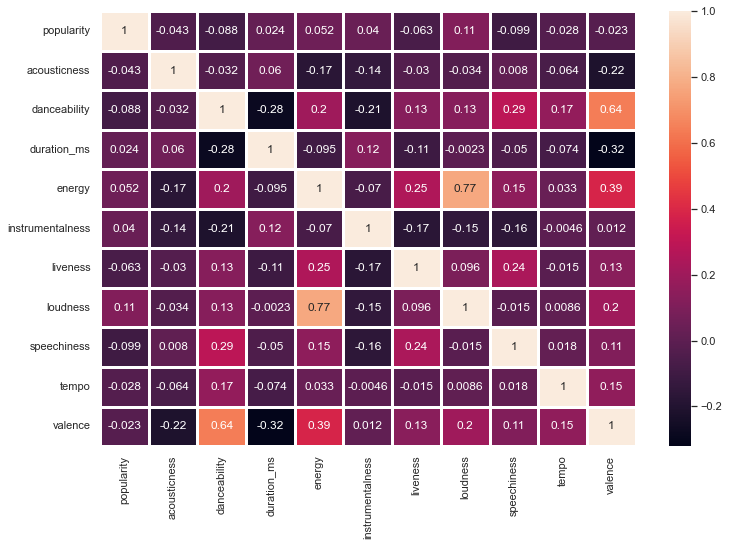

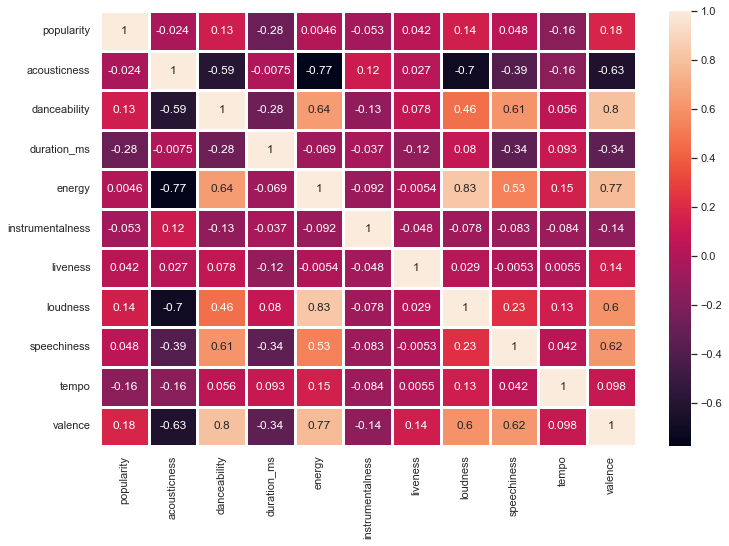

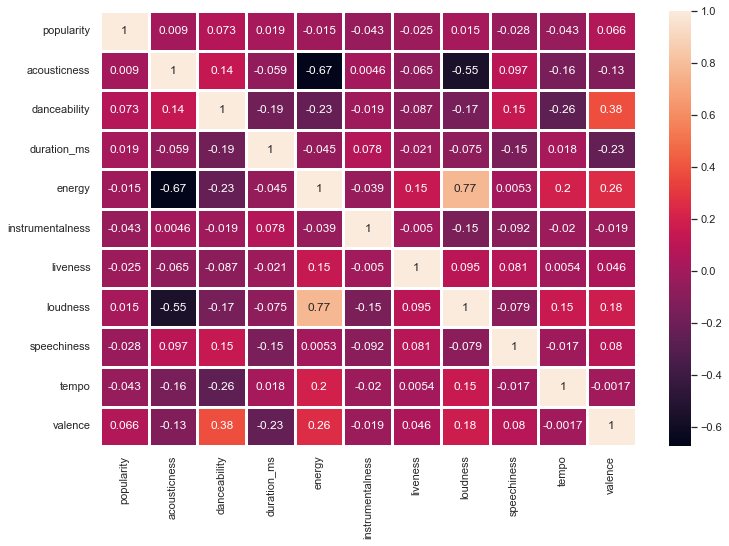

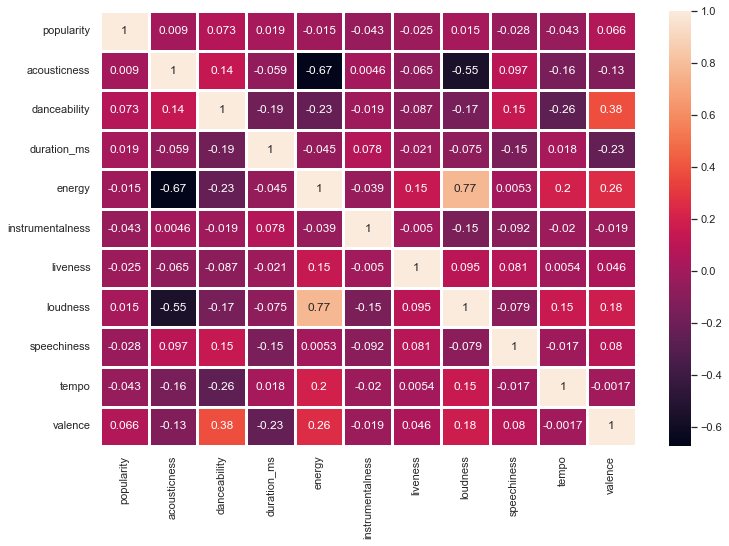

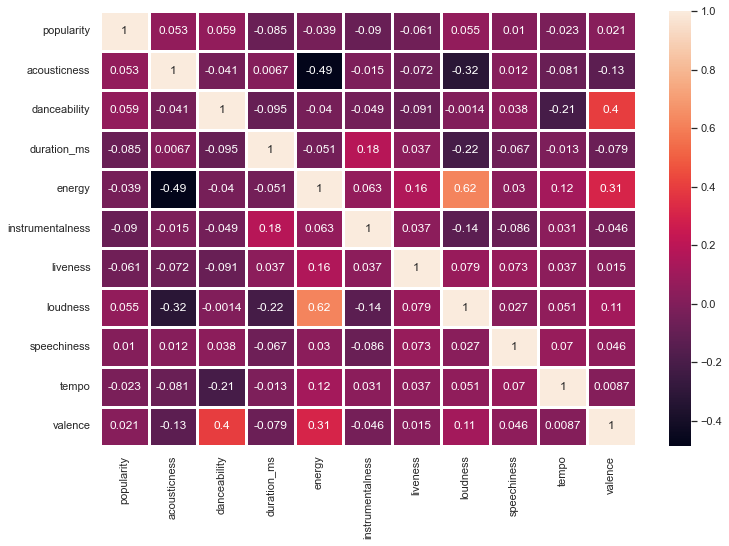

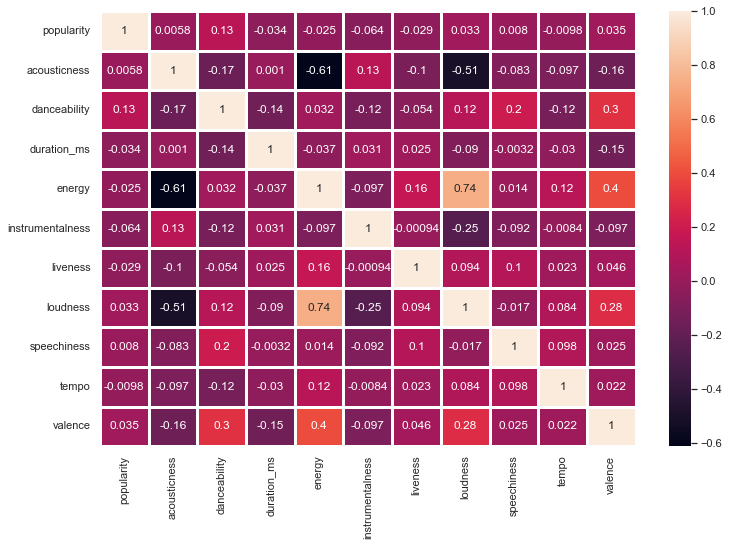

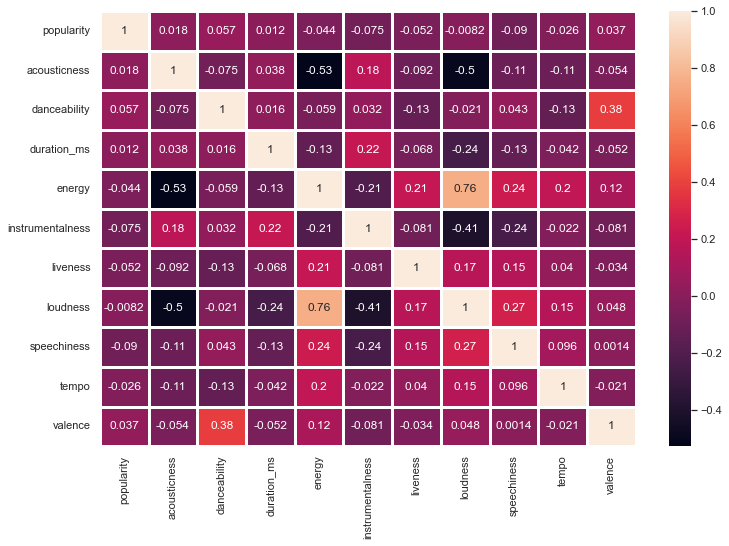

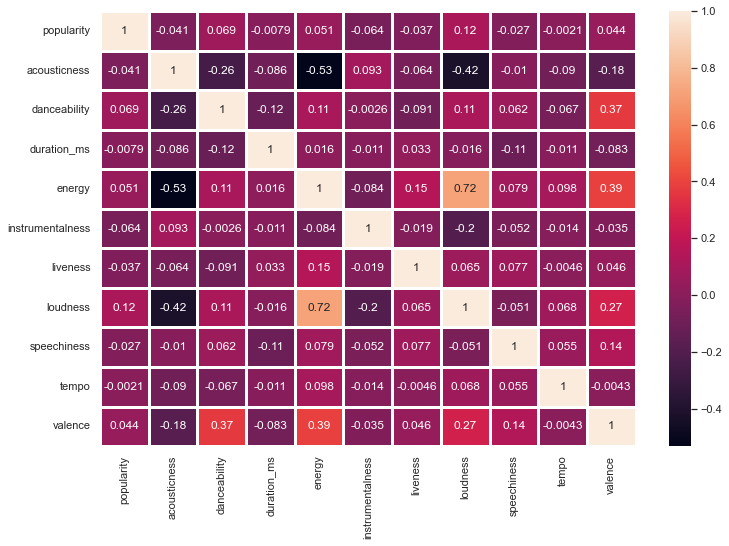

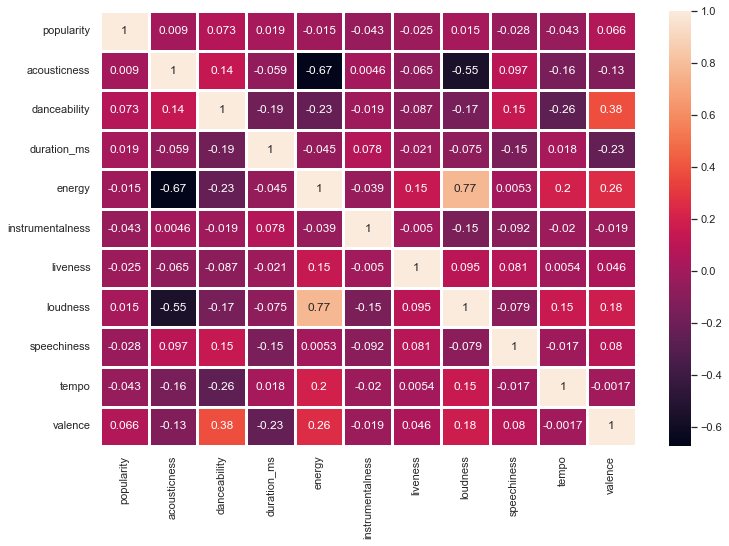

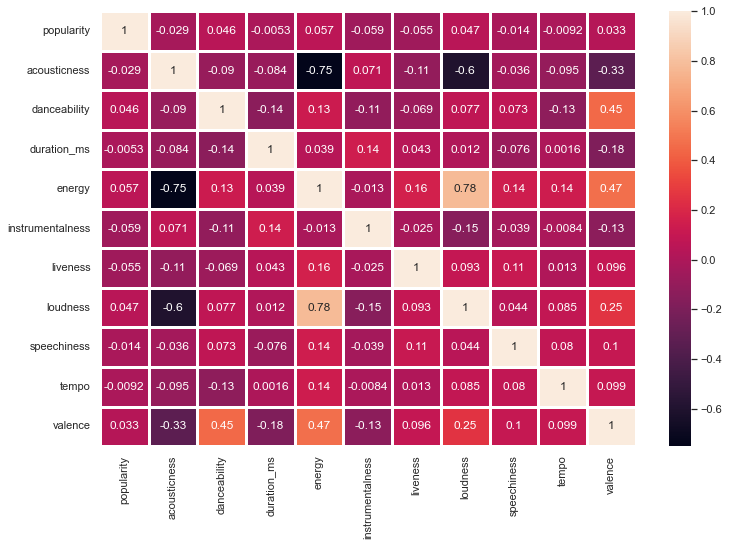

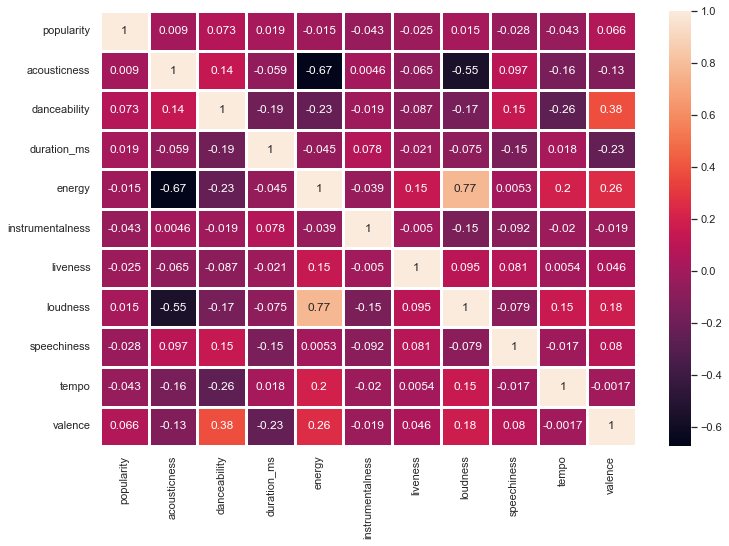

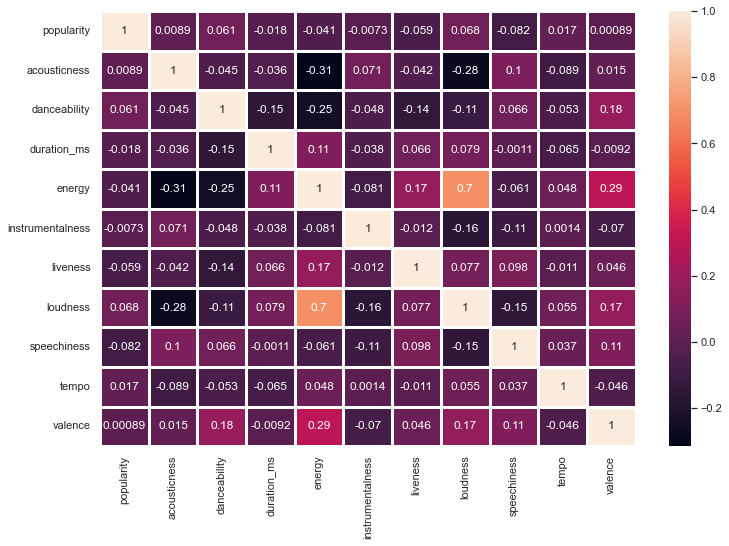

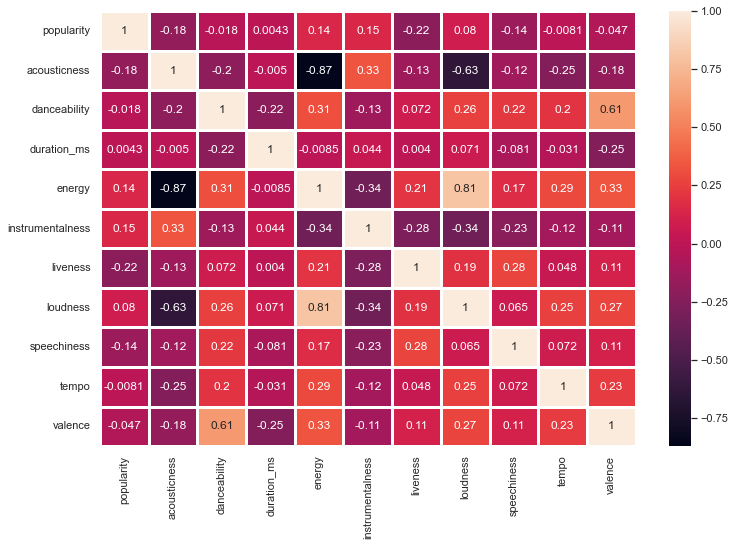

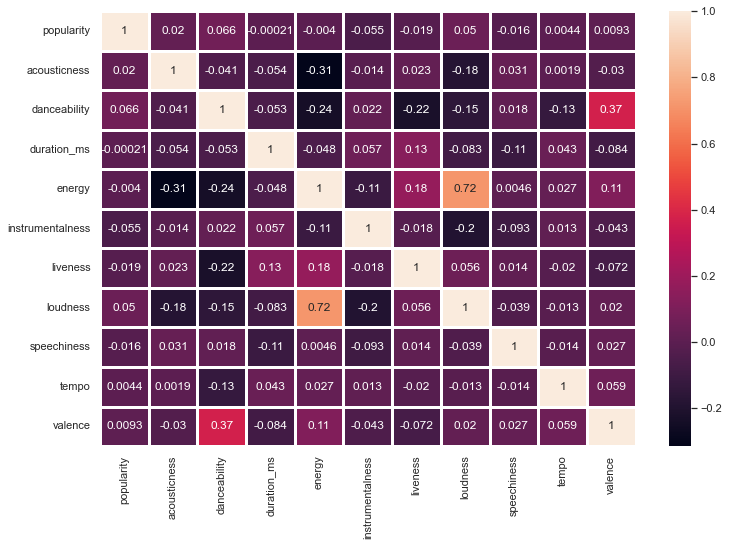

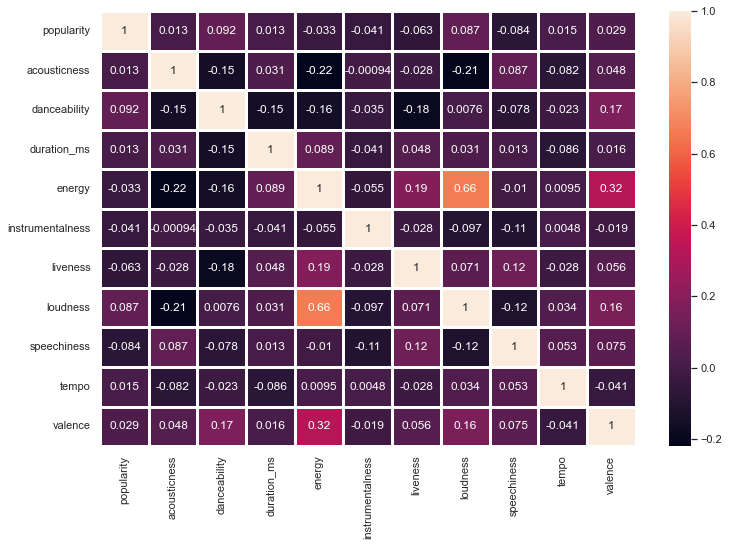

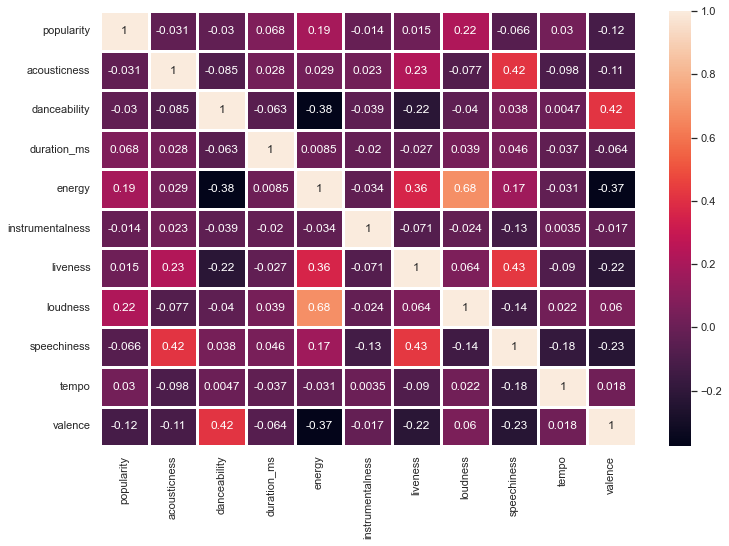

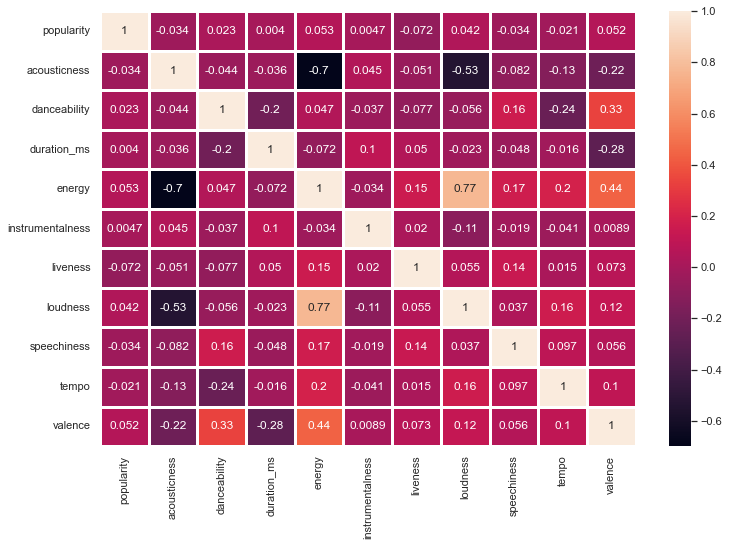

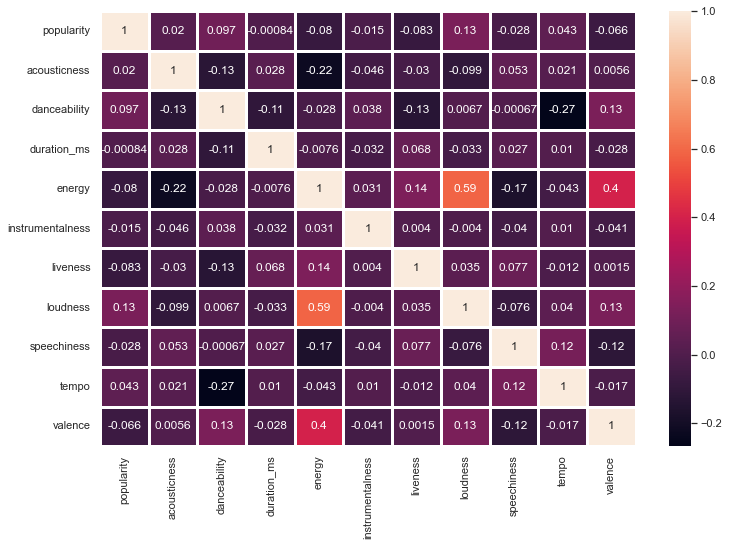

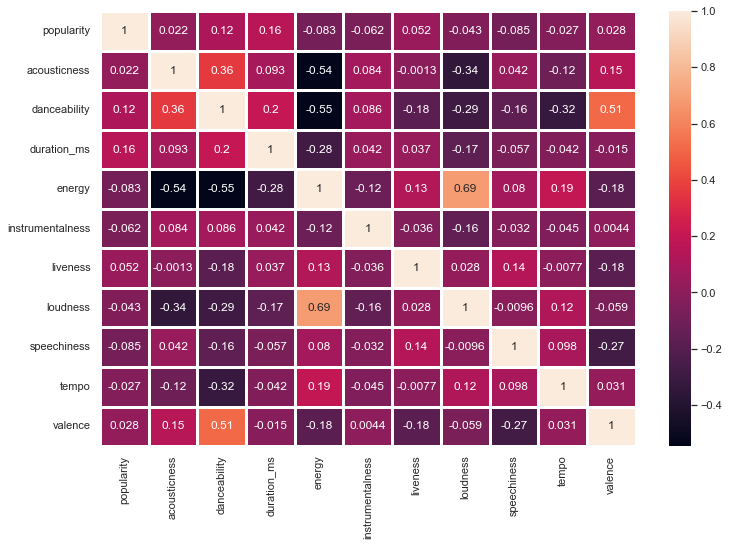

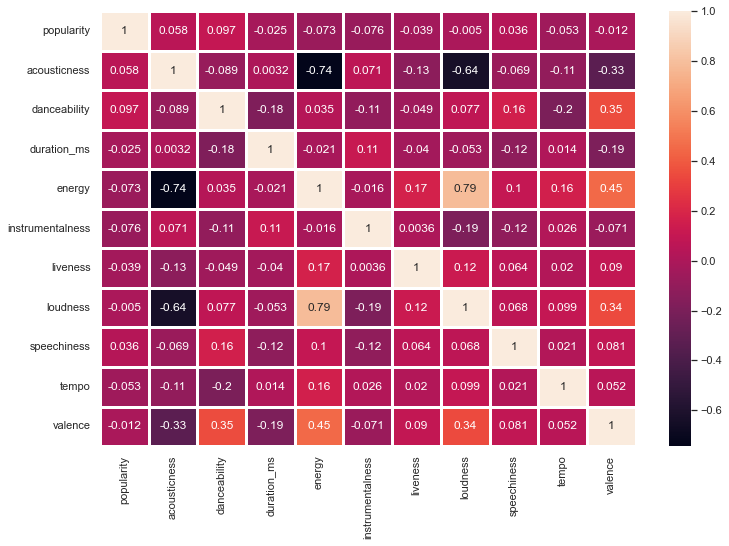

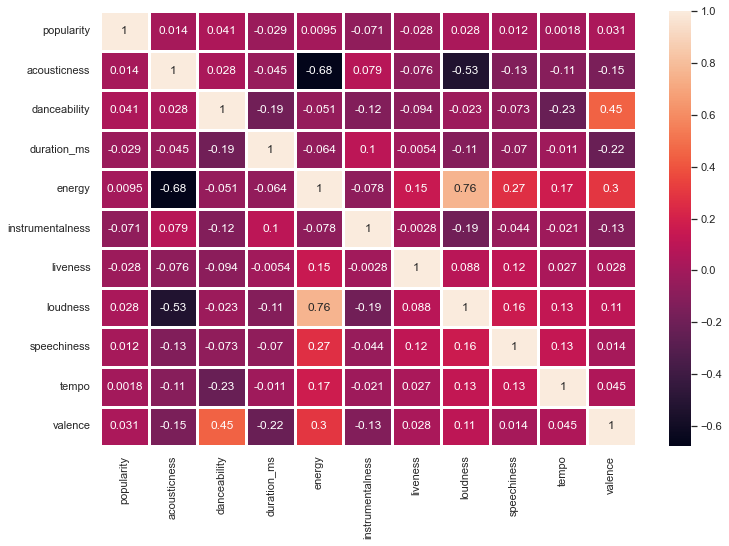

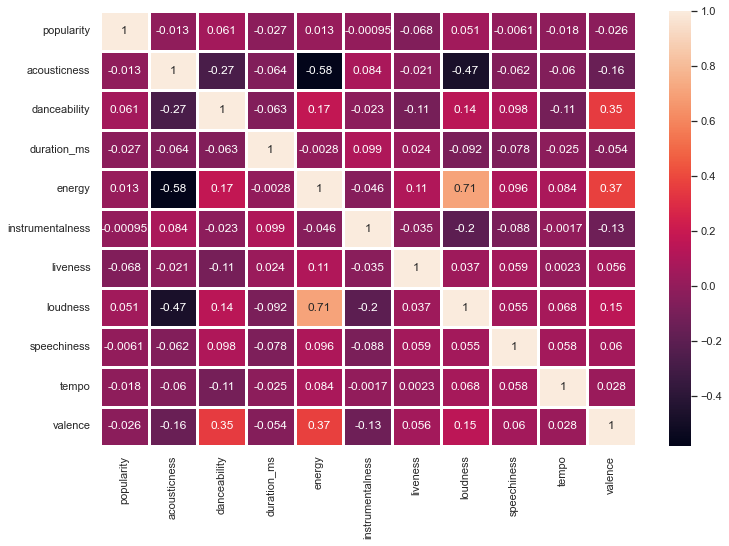

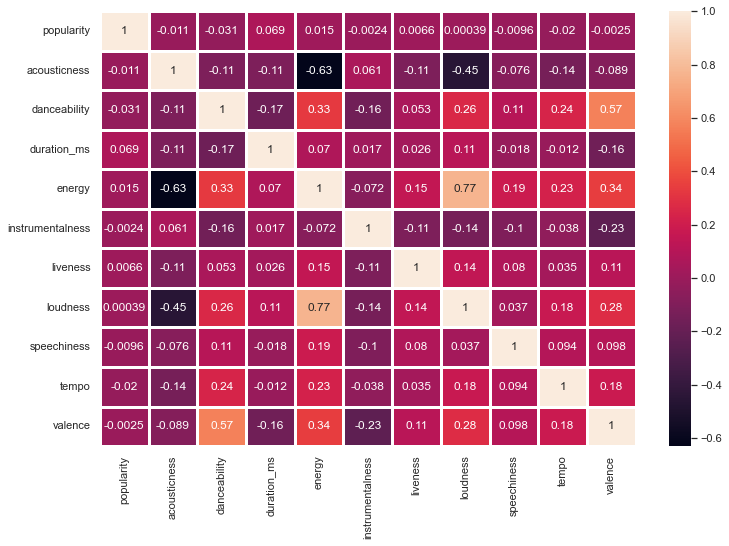

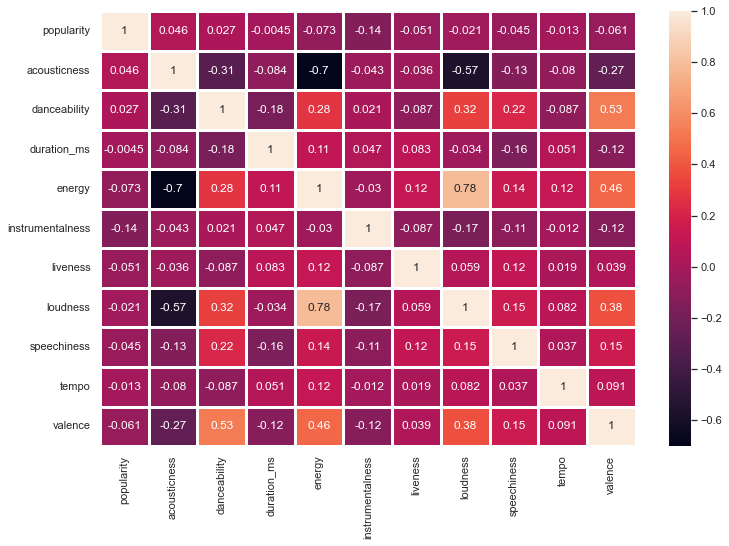

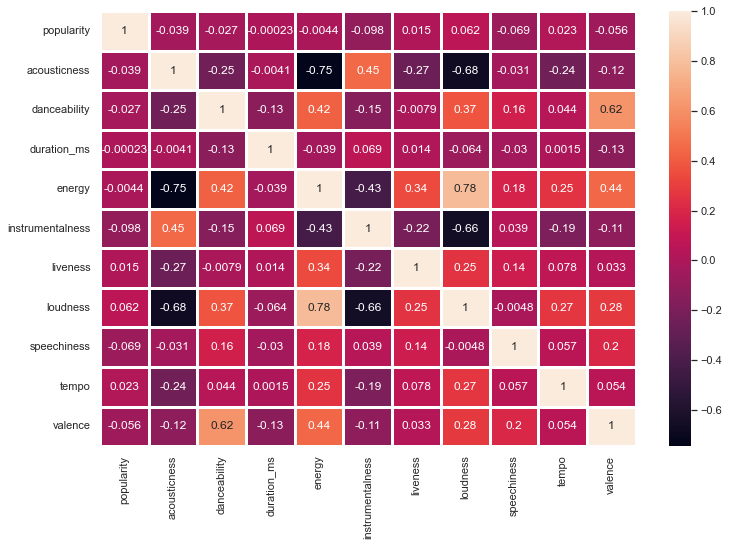

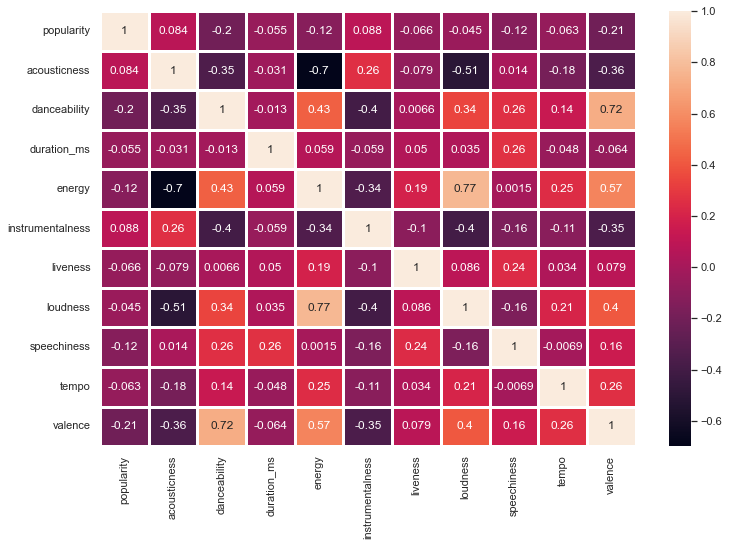

In [7]:
for i in df.genre.unique():
    numericals = df[df['genre']==i].select_dtypes(include = np.number)   
    correlations_matrix = numericals.corr()
    sns.heatmap(correlations_matrix, sns.set(rc = {'figure.figsize':(12,8)}), linewidths=3, annot=True)
    plt.show()

In [8]:
###########################################################################################################################

# Grouping genres

In [9]:
df_grouping = pd.read_csv('Genres.csv', delimiter=';')
for i in df_grouping.columns:
    df_grouping[i] = df_grouping[i].fillna(0)
df_grouping

Feature  Opera  A Capella  Alternative  Blues  Dance    Pop  \
0     Acousticnesss  0.000      0.000        0.000  0.000  0.053  0.000   
1      danceability -0.088      0.130        0.073  0.073  0.059  0.130   
2       duration_ms  0.000     -0.280        0.000  0.000 -0.085  0.000   
3            energy  0.052      0.000        0.000  0.000  0.000  0.000   
4  instrumentalness  0.000     -0.053        0.000  0.000  0.000 -0.064   
5          liveness  0.000      0.000        0.000  0.000 -0.061  0.000   
6          loudness  0.110      0.140        0.000  0.000  0.055  0.000   
7       speechiness -0.099      0.000        0.000  0.000  0.000  0.000   
8             tempo  0.000     -0.160        0.000  0.000  0.000  0.000   
9           valence  0.000      0.180        0.066  0.066  0.000  0.000   

   Electronic    R&B  Children's music  ...  Country  Reggaeton    Ska  Indie  \
0       0.000  0.000             0.000  ...    0.000     0.0000  0.000  0.058   
1       0.057  0.069             0.073  ...    0.000     0.0970  0.120  0.097   
2       0.000  0.000             0.000  ...    0.000     0.0000  0.160  0.000   
3       0.000  0.051             0.000  ...    0.053    -0.0800 -0.083 -0.073   
4      -0.075 -0.064             0.000  ...    0.000     0.0000 -0.062 -0.076   
5      -0.052  0.000             0.000  ...    0.000    -0.0853  0.052  0.000   
6       0.000  0.120             0.000  ...    0.000     0.1300  0.000  0.000   
7      -0.090  0.000             0.000  ...    0.000     0.0000 -0.085  0.000   
8       0.000  0.000             0.000  ...    0.000     0.0000  0.000 -0.053   
9       0.000  0.000             0.066  ...    0.052    -0.0660  0.000  0.000   

    Rock   Soul  Soundtrack   Jazz  World  Movie  
0  0.000  0.000       0.000  0.000  0.000  0.084  
1  0.000  0.061       0.000  0.000  0.000 -0.200  
2  0.000  0.000       0.069  0.000  0.000  0.000  
3  0.000  0.000       0.000 -0.073  0.000 -0.120  
4 -0.071  0.000       0.000 -0.140 -0.098  0.088  
5  0.000 -0.068       0.000 -0.051  0.000 -0.066  
6  0.000  0.051       0.000  0.000  0.062  0.000  
7  0.000  0.000       0.000  0.000 -0.069 -0.120  
8  0.000  0.000       0.000  0.000  0.000 -0.063  
9  0.000  0.000       0.000 -0.061 -0.056 -0.210  

[10 rows x 27 columns]

In [10]:
df_grouping.columns

Index(['Feature', 'Opera', 'A Capella', 'Alternative', 'Blues', 'Dance', 'Pop',
       'Electronic', 'R&B', 'Children's music', 'Folk', 'Anime', 'Rap',
       'Classical', 'Reggae', 'Hip-Hop', 'Comedy', 'Country', 'Reggaeton',
       'Ska', 'Indie', 'Rock', 'Soul', 'Soundtrack', 'Jazz', 'World', 'Movie'],
      dtype='object')

In [11]:
for i in df_grouping.columns:
    if(i!='Feature'):
        df_grouping[i] = (df_grouping[i]).astype(float)

In [12]:
df_grouping.dtypes

Feature              object
Opera               float64
A Capella           float64
Alternative         float64
Blues               float64
Dance               float64
Pop                 float64
Electronic          float64
R&B                 float64
Children's music    float64
Folk                float64
Anime               float64
Rap                 float64
Classical           float64
Reggae              float64
Hip-Hop             float64
Comedy              float64
Country             float64
Reggaeton           float64
Ska                 float64
Indie               float64
Rock                float64
Soul                float64
Soundtrack          float64
Jazz                float64
World               float64
Movie               float64
dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


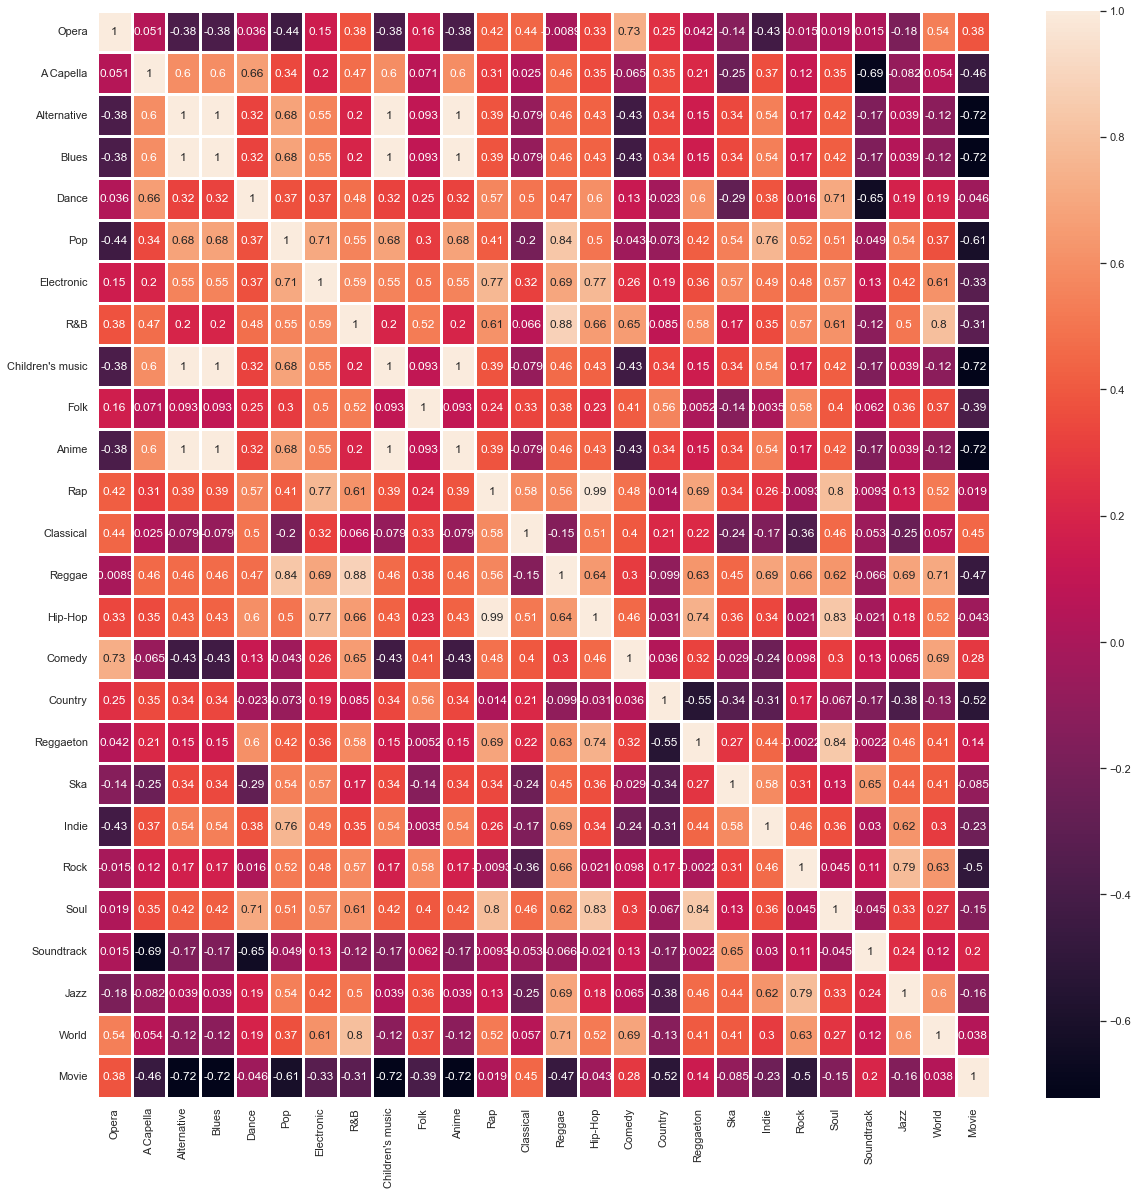

In [13]:
numericals_grouping = df_grouping.select_dtypes(include = np.number)   
correlations_matrix = numericals_grouping.corr()
sns.heatmap(correlations_matrix, sns.set(rc = {'figure.figsize':(20,20)}), linewidths=3, annot=True)
plt.show()

In [14]:
df.genre.unique()

array(['Opera', 'A Capella', 'Alternative', 'Blues', 'Dance', 'Pop',
       'Electronic', 'R&B', 'Children’s Music', 'Folk', 'Anime', 'Rap',
       'Classical', 'Reggae', 'Hip-Hop', 'Comedy', 'Country', 'Reggaeton',
       'Ska', 'Indie', 'Rock', 'Soul', 'Soundtrack', 'Jazz', 'World',
       'Movie'], dtype=object)

In [15]:
group_1 = ['Alternative','Blues','Anime','Children’s Music','Indie', 'Dance', 'A Capella']
group_2 = ['Rap', 'Hip-Hop', 'Electronic', 'Soul', 'Reggaeton']
group_3 = ['R&B', 'Reggae','Pop','World','Jazz','Rock']
group_4 = ['Opera','Comedy','Classical','Movie']
group_5 = ['Ska', 'Soundtrack']
group_6 = ['Folk','Country']

In [16]:
for a in group_1:
    df_group_1 = df[df['genre']==a]

for b in group_2:
    df_group_2 = df[df['genre']==b]

for c in group_3:
    df_group_3 = df[df['genre']==c]

for d in group_4:
    df_group_4 = df[df['genre']==d]

for e in group_5:
    df_group_5 = df[df['genre']==e]
    
for f in group_6:
    df_group_6 = df[df['genre']==f]

list = ['df_group_1', 'df_group_2', 'df_group_3', 'df_group_4', 'df_group_5']

In [17]:
##############################################################################################################################

# Defining functions


In [18]:
def numerical_features_most_related_with_popularity(df):
    df = df.reset_index()
    df = df.drop(['index'], axis=1)
    
    numericals = df.select_dtypes(include = np.number)
    categoricals = df.select_dtypes(include = object)
    
    correlations_matrix = numericals.corr()
    sns.heatmap(correlations_matrix, sns.set(rc = {'figure.figsize':(12,8)}), linewidths=3, annot=True)
    plt.show()
    
    return numericals, categoricals


In [19]:
def study_of_numerical_features_related_with_popularity(df):
    for i in list:
        sns.distplot(numericals[i],bins=150)
        plt.show()
        
    for j in list:
        sns.jointplot(x = j, y = 'popularity', data = numericals)
    

In [20]:
def eliminate_outliers_of_popularity(df, numericals):
    sns.distplot(df['popularity']).set_title('Popularity Distribution')
    plt.show()
   
    sns.boxplot(numericals['popularity'])
    plt.show()
    
    upper = np.percentile(df['popularity'],75)
    lower = np.percentile(df['popularity'],25)
    iqr = upper - lower
    upper_limit = upper + 1.5 * iqr
    lower_limit = lower - 1.5 * iqr
    df = df[(df['popularity']>lower_limit) & (df['popularity']<upper_limit)]
    
    
    numericals = df.select_dtypes(include = np.number)
    correlations_matrix = numericals.corr()
    sns.heatmap(correlations_matrix, sns.set(rc = {'figure.figsize':(12,8)}), linewidths=3, annot=True)
    plt.show()
    
    return upper, lower, df

In [21]:
def popularity_classification (df):

    if (df<upper):
        return 0
    elif (df>=upper):
        return 1

In [22]:
def grouping_popularity(df):
        
    numericals_test = df.select_dtypes(include = np.number)
    correlations_matrix = numericals_test.corr()
    sns.heatmap(correlations_matrix, sns.set(rc = {'figure.figsize':(12,8)}), linewidths=3, annot=True)
    plt.show()
    
    return numericals_test

In [23]:
def study_of_numerical_features_that_are_most_correlated(df, list):
    
    for i in list:
        g = sns.FacetGrid(numericals_test, col = "popularity")
        g.map(sns.distplot, i, bins = 25)
        plt.show() 
    

In [24]:
def study_of_categorical_features(df):
    
    graph = sns.factorplot(x = "key", y = "popularity", data = df, kind = "bar", size = 6)
    graph.set_ylabels("Popularity Probability")
    plt.show() 
    
    graph = sns.factorplot(x = "mode", y = "popularity", data = df, kind = "bar", size = 6)
    graph.set_ylabels("Popularity Probability")
    plt.show()
    
    graph = sns.factorplot(x = "time_signature", y = "popularity", data = df, kind = "bar", size = 6)
    graph.set_ylabels("Popularity Probability")
    plt.show()

In [25]:
def last_correlation_map(df):
    numericals_test = df.select_dtypes(include = np.number)
    correlations_matrix = numericals_test.corr()
    sns.heatmap(correlations_matrix, sns.set(rc = {'figure.figsize':(12,8)}), linewidths=3, annot=True)
    plt.show()

In [26]:
# def preparing_for_models(numericals_test):
    
#     X = numericals_test.drop(['popularity'],axis=1)
#     y = numericals_test['popularity']
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
#     transformer = StandardScaler().fit(X_train)
#     X_train_scaled = transformer.transform(X_train)
#     X_test_scaled = transformer.transform(X_test)
    
#     y_train = y_train.reset_index(drop=True)
#     y_test = y_test.reset_index(drop=True) 
    
#     return X_train_scaled, X_test_scaled, y_train, y_test


In [27]:
def logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test):
    
    LR = LogisticRegression()
    LR.fit(X_train_scaled, y_train)
#     print('score:', LR.score(X_test_scaled, y_test))
    print('accuracy:',LR.score(X_train_scaled, y_train))
          
    y_pred = LR.predict(X_test_scaled)
    print("precision: ",precision_score(y_test,y_pred))
    print("recall: ",recall_score(y_test,y_pred))
    print(confusion_matrix(y_test, y_pred))

In [28]:
def downsampling(category_0, category_1):
    
    category_0_undersampled = resample(category_0, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(category_1),
                                    random_state=0)
    
    print(category_0_undersampled.shape)
    print(category_1.shape)
    
    data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)
    data_downsampled = data_downsampled.sample(frac =1) #randomize the rows
    
    X = data_downsampled.drop(['popularity'], axis = 1)
    y = data_downsampled['popularity']
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    
    X_train_scaled = transformer.transform(X_train)
    X_test_scaled = transformer.transform(X_test)
    
    LR = LogisticRegression(random_state=0, solver='lbfgs')
    LR.fit(X_train_scaled, y_train)
    
    print('accuracy:',LR.score(X_train_scaled, y_train))

    y_pred = LR.predict(X_test_scaled)
    print("precision: ",precision_score(y_test,y_pred))
    print("recall: ",recall_score(y_test,y_pred))
    print(confusion_matrix(y_test, y_pred))

In [29]:
def upsampling(category_0, category_1):
    
    category_1_upsampled = resample(category_1, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(category_0),#<- make both sets the same size
                                    random_state=0)
    
    print(category_1_upsampled.shape)
    print(category_0.shape)
    
    data_upsampled = pd.concat([category_1_upsampled, category_0], axis=0)
    data_upsampled = data_upsampled.sample(frac =1) #randomize the rows
    
    X = data_upsampled.drop(['popularity'], axis = 1)
    y = data_upsampled['popularity']
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    
    X_train_scaled = transformer.transform(X_train)
    X_test_scaled = transformer.transform(X_test)
    
    LR = LogisticRegression(random_state=0, solver='lbfgs')
    LR.fit(X_train_scaled, y_train)
    
    print('accuracy:',LR.score(X_train_scaled, y_train))
    
    y_pred = LR.predict(X_test_scaled)
    print("precision: ",precision_score(y_test,y_pred))
    print("recall: ",recall_score(y_test,y_pred))
    print(confusion_matrix(y_test, y_pred))


In [30]:
def get_best_Random_forrest(X_train_scaled, X_test_scaled, y_train, y_test):
    
    max_depth_choices= [3,4,5,None]
    # criterion_choices = ['mse','mae']
    min_samples_split_choices = [2,3,4,5,6,7,8,9,10]
    min_samples_leaf_choices = [2,3,4,5,6,7,8,9,10]
    max_features_choices = [2,3,4,5,6]



    random_grid = {'max_depth': max_depth_choices,
                   #'criterion': criterion_choices,
                   'min_samples_split': min_samples_split_choices,
                   'min_samples_leaf': min_samples_leaf_choices,
                   'max_features': max_features_choices}
    
    random_search = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid,  n_iter=25, cv = 5, n_jobs = 10)
    
    random_search.fit(X_train_scaled,y_train)
    
    print(random_search.best_params_)
    
    random_search.best_score_
    

In [31]:
def execute_Random_Forest(a,b,c,d, X_train_scaled, X_test_scaled, y_train, y_test):
    
    clf = RandomForestClassifier(max_depth=None,
                             min_samples_split=a,
                             min_samples_leaf =b,
                             max_features=c,
                             random_state = 42)
    
    clf.fit(X_train_scaled, y_train)
    print(clf.score(X_train_scaled, y_train))
#     print(clf.score(X_test_scaled, y_test))

    y_pred = clf.predict(X_test_scaled)
    display(y_test.value_counts())
    print("precision: ",precision_score(y_test,y_pred))
    print("recall: ",recall_score(y_test,y_pred))
    display(confusion_matrix(y_test, y_pred))


In [32]:
def execute_Random_Forest_downsampling(a,b,c,d, category_0, category_1):
    
    clf = RandomForestClassifier(max_depth=d,
                             min_samples_split=a,
                             min_samples_leaf =b,
                             max_features=c,
                             random_state = 42)
    

    category_0_undersampled = resample(category_0, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(category_1),
                                    random_state=0)
    
    print(category_0_undersampled.shape)
    print(category_1.shape)
    
    data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)
    data_downsampled = data_downsampled.sample(frac =1) #randomize the rows
    
    X = data_downsampled.drop(['popularity'], axis = 1)
    y = data_downsampled['popularity']
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    
    X_train_scaled = transformer.transform(X_train)
    X_test_scaled = transformer.transform(X_test)
    
    clf.fit(X_train_scaled, y_train)
    print(clf.score(X_train_scaled, y_train))
#     print(clf.score(X_test_scaled, y_test))

    y_pred = clf.predict(X_test_scaled)
    display(y_test.value_counts())
    print("precision: ",precision_score(y_test,y_pred))
    print("recall: ",recall_score(y_test,y_pred))
    display(confusion_matrix(y_test, y_pred))

In [33]:
def execute_Random_Forest_upsampling(a,b,c,d, category_0, category_1):
    
    clf = RandomForestClassifier(max_depth=d,
                             min_samples_split=a,
                             min_samples_leaf =b,
                             max_features=c,
                             random_state = 42)
        
    category_1_upsampled = resample(category_1, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(category_0),#<- make both sets the same size
                                    random_state=0)
    
    print(category_1_upsampled.shape)
    print(category_0.shape)
    
    data_upsampled = pd.concat([category_1_upsampled, category_0], axis=0)
    data_upsampled = data_upsampled.sample(frac =1) #randomize the rows
    
    X = data_upsampled.drop(['popularity'], axis = 1)
    y = data_upsampled['popularity']
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    
    X_train_scaled = transformer.transform(X_train)
    X_test_scaled = transformer.transform(X_test)
    
    clf.fit(X_train_scaled, y_train)
    print(clf.score(X_train_scaled, y_train))
#     print(clf.score(X_test_scaled, y_test))


    y_pred = clf.predict(X_test_scaled)
    display(y_test.value_counts())
    print("precision: ",precision_score(y_test,y_pred))
    print("recall: ",recall_score(y_test,y_pred))
    display(confusion_matrix(y_test, y_pred))

In [34]:
def get_best_Decision_tree_classifier(X_train_scaled, X_test_scaled, y_train, y_test):
    
    max_depth_choices= [3,4,5,None]
    # criterion_choices = ['mse','mae']
    min_samples_split_choices = [2,3,4,5,6,7,8,9,10]
    min_samples_leaf_choices = [2,3,4,5,6,7,8,9,10]
    max_features_choices = [2,3,4,5,6]



    random_grid = {'max_depth': max_depth_choices,
                   #'criterion': criterion_choices,
                   'min_samples_split': min_samples_split_choices,
                   'min_samples_leaf': min_samples_leaf_choices,
                   'max_features': max_features_choices}
    
    random_search = RandomizedSearchCV(estimator = DecisionTreeClassifier(), param_distributions = random_grid,  n_iter=25, cv = 5, n_jobs = 10)
    
    random_search.fit(X_train_scaled,y_train)
    
    print(random_search.best_params_)
    
    random_search.best_score_

In [35]:
def execute_Decision_tree_classifier(a,b,c,d, X_train_scaled, X_test_scaled, y_train, y_test):
    
    clf = DecisionTreeClassifier(max_depth=d,
                             min_samples_split=a,
                             min_samples_leaf =b,
                             max_features=c,
                             random_state = 42)
    
    clf.fit(X_train_scaled, y_train)
    print(clf.score(X_train_scaled, y_train))
#     print(clf.score(X_test_scaled, y_test))

    y_pred = clf.predict(X_test_scaled)
    display(y_test.value_counts())
    print("precision: ",precision_score(y_test,y_pred))
    print("recall: ",recall_score(y_test,y_pred))
    display(confusion_matrix(y_test, y_pred))

In [36]:
def execute_Decision_tree_classifier_downsampling(a,b,c,d, category_0, category_1):
    
    clf = DecisionTreeClassifier(max_depth=d,
                             min_samples_split=a,
                             min_samples_leaf =b,
                             max_features=c,
                             random_state = 42)

    category_0_undersampled = resample(category_0, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(category_1),
                                    random_state=0)
    
    print(category_0_undersampled.shape)
    print(category_1.shape)
    
    data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)
    data_downsampled = data_downsampled.sample(frac =1) #randomize the rows
    
    X = data_downsampled.drop(['popularity'], axis = 1)
    y = data_downsampled['popularity']
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    
    X_train_scaled = transformer.transform(X_train)
    X_test_scaled = transformer.transform(X_test)
    
    clf.fit(X_train_scaled, y_train)
    print(clf.score(X_train_scaled, y_train))
#     print(clf.score(X_test_scaled, y_test))

    y_pred = clf.predict(X_test_scaled)
    display(y_test.value_counts())
    print("precision: ",precision_score(y_test,y_pred))
    print("recall: ",recall_score(y_test,y_pred))
    display(confusion_matrix(y_test, y_pred))

In [37]:
def execute_Decision_tree_classifier_upsampling(a,b,c,d, category_0, category_1):
    
    clf = DecisionTreeClassifier(max_depth=d,
                             min_samples_split=a,
                             min_samples_leaf =b,
                             max_features=c,
                             random_state = 42)
        
    category_1_upsampled = resample(category_1, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(category_0),#<- make both sets the same size
                                    random_state=0)
    
    print(category_1_upsampled.shape)
    print(category_0.shape)
    
    data_upsampled = pd.concat([category_1_upsampled, category_0], axis=0)
    data_upsampled = data_upsampled.sample(frac =1) #randomize the rows
    
    X = data_upsampled.drop(['popularity'], axis = 1)
    y = data_upsampled['popularity']
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    
    X_train_scaled = transformer.transform(X_train)
    X_test_scaled = transformer.transform(X_test)
    
    clf.fit(X_train_scaled, y_train)
    print(clf.score(X_train_scaled, y_train))
#     print(clf.score(X_test_scaled, y_test))

    y_pred = clf.predict(X_test_scaled)
    display(y_test.value_counts())
    print("precision: ",precision_score(y_test,y_pred))
    print("recall: ",recall_score(y_test,y_pred))
    display(confusion_matrix(y_test, y_pred))

In [38]:
##############################################################################################################################

# Looking at group 1

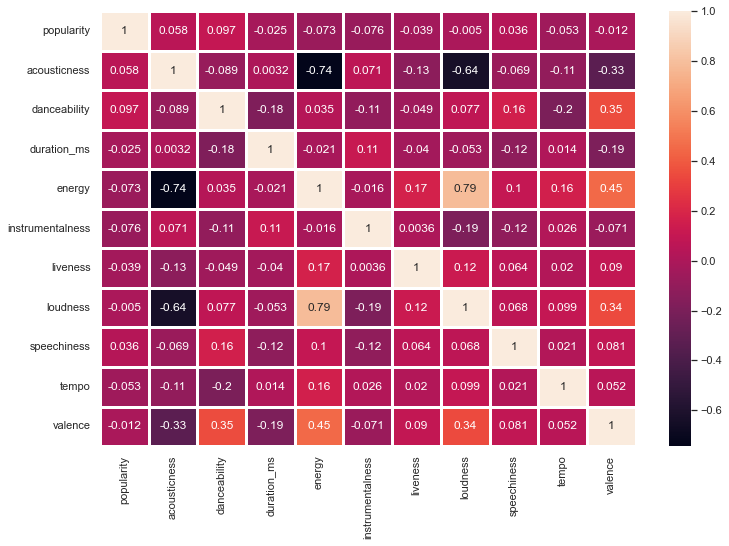

In [39]:
numericals, categoricals = numerical_features_most_related_with_popularity(df_group_1)

## Studying the numerical features that are mostly related with popularity

In [40]:
list = ['danceability','energy', 'instrumentalness']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


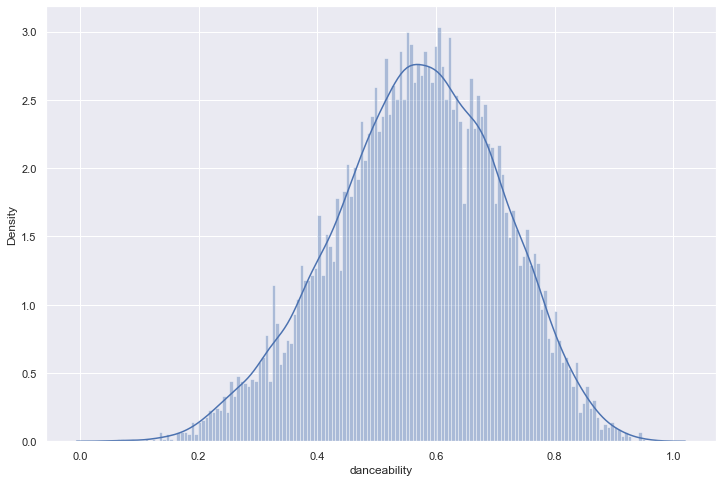

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


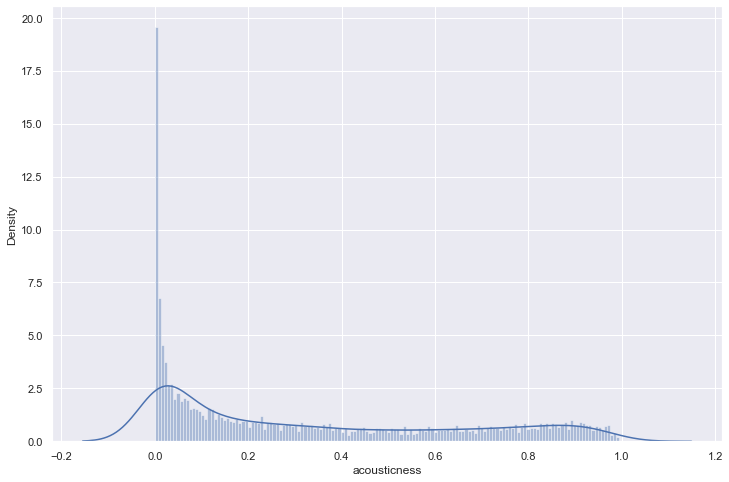

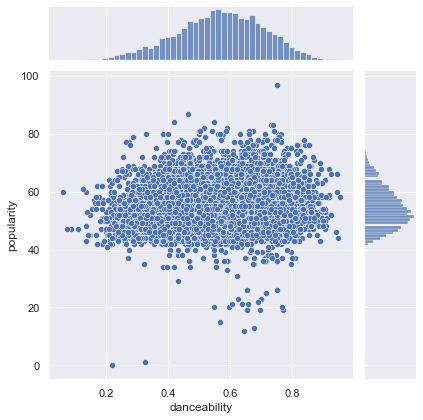

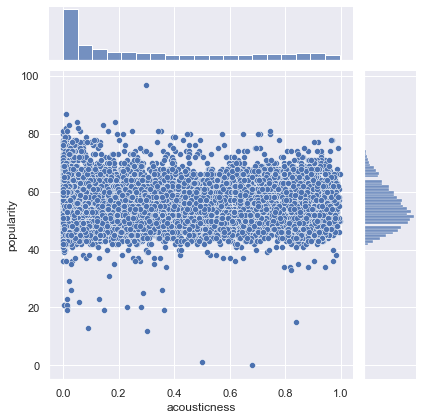

In [41]:
study_of_numerical_features_related_with_popularity(df_group_1)

## Looking more closely at popularity

### Looking at the correlation after eliminating popularity's outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


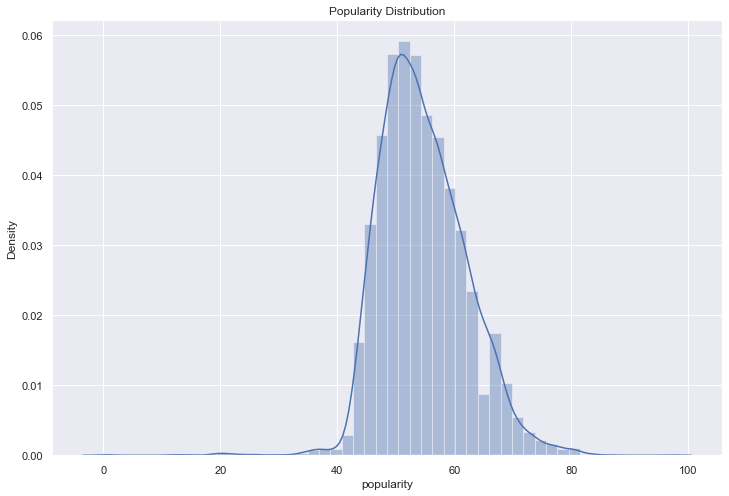

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


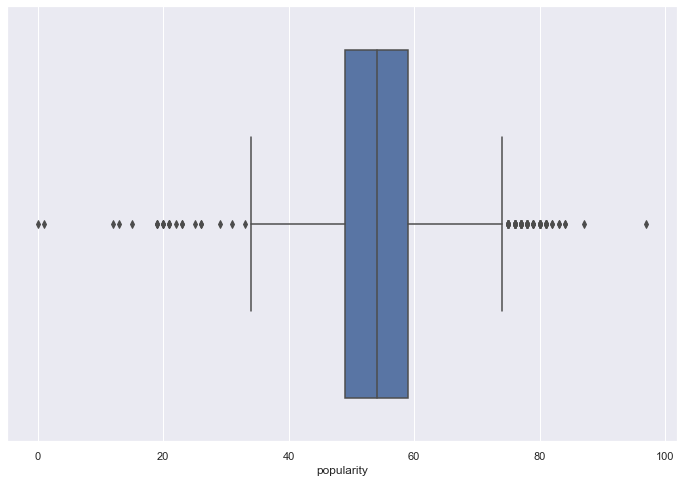

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


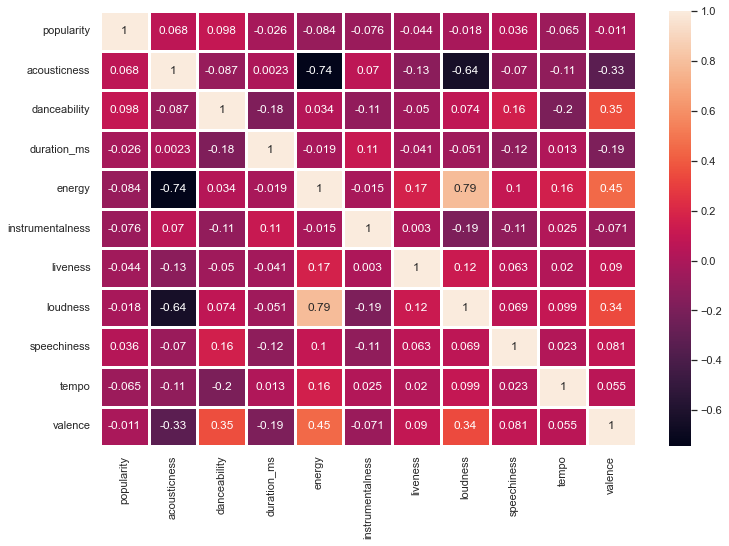

In [42]:
df_group_1_unnecesary = df_group_1.copy()
upper, lower, df_group_1_unnecesary = eliminate_outliers_of_popularity(df_group_1, numericals)

In [43]:
upper

59.0

In [44]:
# Improvement can be seen in the correlation with population as a whole

### Grouping popularity

In [45]:
# df_group_1_test = df_group_1.copy()

In [46]:
df_group_1['popularity'] = df_group_1['popularity'].apply(popularity_classification)


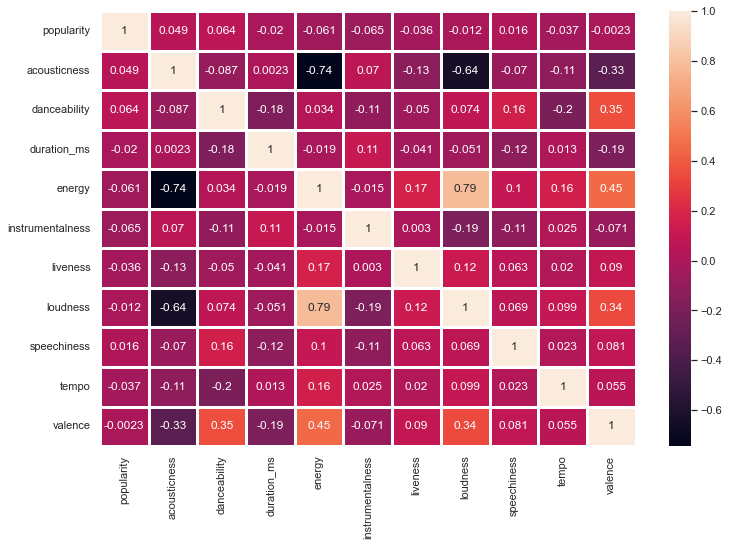

In [47]:
numericals_test = grouping_popularity(df_group_1)

In [48]:
# There is the same correlation for group 1 whether or not the popularity column is grouped. 

### Looking at the numerical features that are mostly related with popularity (now in binary mode)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


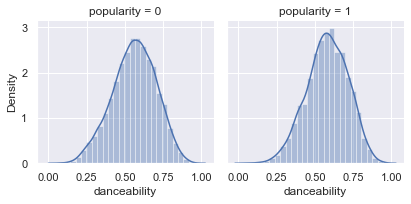

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


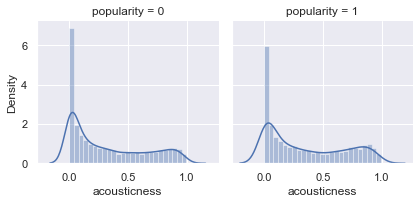

In [49]:
study_of_numerical_features_that_are_most_correlated(numericals_test, list)

### Looking at the categorical features

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


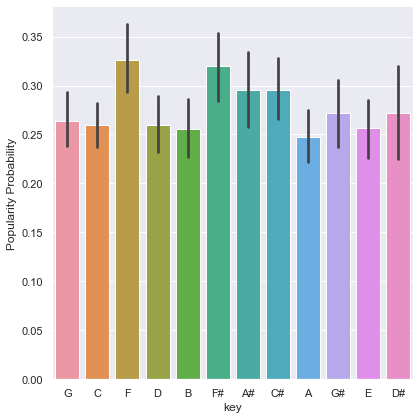

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


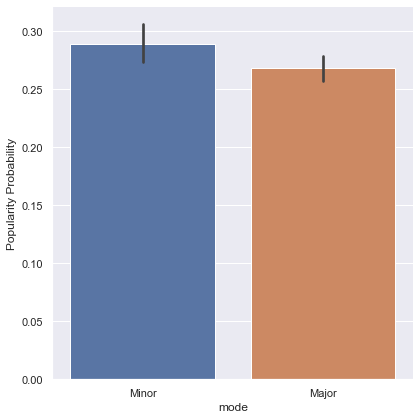

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


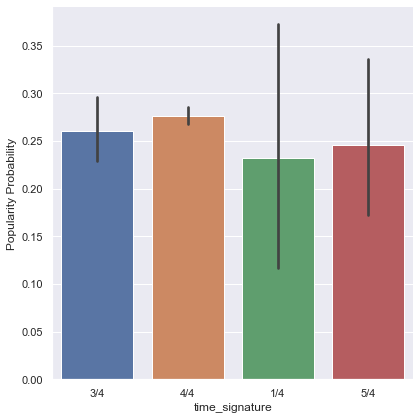

In [50]:
study_of_categorical_features(df_group_1)

In [51]:
df_group_1["key"] = (df_group_1["key"].map({"D" : 3, "F" : 12, "D#" : 7, "C#" : 9, "E" : 4, "C" : 5, "G" : 6, "A" : 1, "A#" : 10, "B" : 2, "G#" : 8, "F#" : 11})).astype('float')
df_group_1["mode"] = (df_group_1["mode"].map({"Minor" : 1, "Major" : 0})).astype('float')
df_group_1["time_signature"] = (df_group_1["time_signature"].map({"4/4" : 4, "3/4" : 3, "1/4" : 1, "5/4" : 2})).astype('float')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


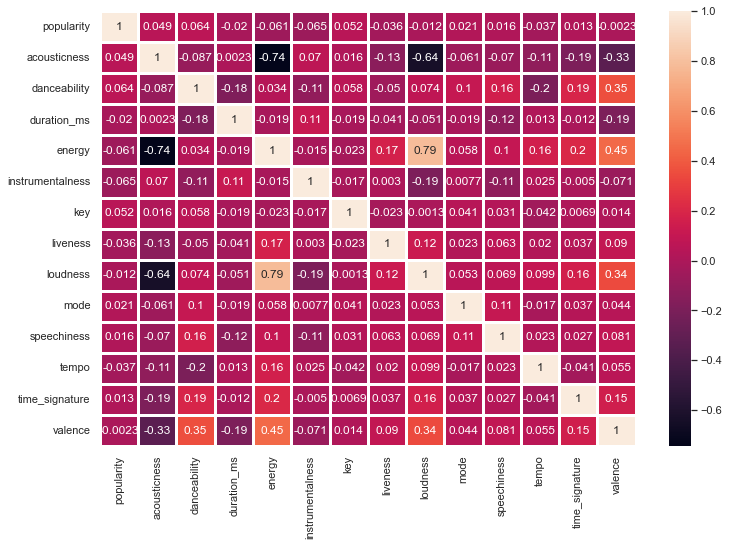

In [52]:
last_correlation_map(df_group_1)

### Modelling group 1

In [53]:
X = numericals_test.drop(['popularity'],axis=1)
y = numericals_test['popularity']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
transformer = StandardScaler().fit(X_train)
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)
    
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True) 

#### Logistic regression

In [54]:
logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test)

accuracy: 0.7243580649737551
precision:  0.0
recall:  0.0
[[1713    0]
 [ 637    0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
category_0 = numericals_test[numericals_test['popularity'] == 0]
category_1 = numericals_test[numericals_test['popularity'] == 1]

###### Downsampling

In [56]:
downsampling(category_0, category_1)

(2580, 11)
(2580, 11)
accuracy: 0.5571059431524548
precision:  0.5198300283286119
recall:  0.5881410256410257
[[327 339]
 [257 367]]


###### Upsampling

In [57]:
upsampling(category_0, category_1)

(6819, 11)
(6819, 11)
accuracy: 0.5524051622995698
precision:  0.5547526403557532
recall:  0.5849941383352872
[[903 801]
 [708 998]]


#### Random Forest Classifier


In [58]:
get_best_Random_forrest(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 3, 'max_depth': None}


In [59]:
execute_Random_Forest(4,4,3,None,X_train_scaled, X_test_scaled, y_train, y_test)

0.9180025535536955


0    1713
1     637
Name: popularity, dtype: int64

precision:  0.43137254901960786
recall:  0.03453689167974882


array([[1684,   29],
       [ 615,   22]], dtype=int64)

###### Downsampling 

In [60]:
execute_Random_Forest_downsampling(4,4,3,None, category_0, category_1)

(2580, 11)
(2580, 11)
0.9912144702842377


0    653
1    637
Name: popularity, dtype: int64

precision:  0.5669781931464174
recall:  0.5714285714285714


array([[375, 278],
       [273, 364]], dtype=int64)

###### Upsampling 

In [61]:
execute_Random_Forest_upsampling(4,4,3,None, category_0, category_1)

(6819, 11)
(6819, 11)
0.9914939382088385


1    1723
0    1687
Name: popularity, dtype: int64

precision:  0.8656542056074766
recall:  0.8601276842716192


array([[1457,  230],
       [ 241, 1482]], dtype=int64)

#### Decision Tree Classifier


In [62]:
get_best_Decision_tree_classifier(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 9, 'min_samples_leaf': 8, 'max_features': 3, 'max_depth': 3}


In [63]:
execute_Decision_tree_classifier(9,8,3,3, X_train_scaled, X_test_scaled, y_train, y_test)


0.7243580649737551


0    1713
1     637
Name: popularity, dtype: int64

precision:  0.0
recall:  0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[1713,    0],
       [ 637,    0]], dtype=int64)

###### Downsampling 

In [64]:
execute_Decision_tree_classifier_downsampling(9,8,3,3, category_0, category_1)

(2580, 11)
(2580, 11)
0.5661498708010336


0    669
1    621
Name: popularity, dtype: int64

precision:  0.5435745937961596
recall:  0.5925925925925926


array([[360, 309],
       [253, 368]], dtype=int64)

###### Upsampling 

In [65]:
execute_Decision_tree_classifier_upsampling(9,8,3,3, category_0, category_1)

(6819, 11)
(6819, 11)
0.5593468908877591


1    1735
0    1675
Name: popularity, dtype: int64

precision:  0.5783353733170135
recall:  0.5446685878962536


array([[986, 689],
       [790, 945]], dtype=int64)

In [66]:
# Conclusion: For group 1 we take the Logistic Regression Upsampling (not the Random Forest because I take it as an unreliable 
# result)

# Looking at group 2

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


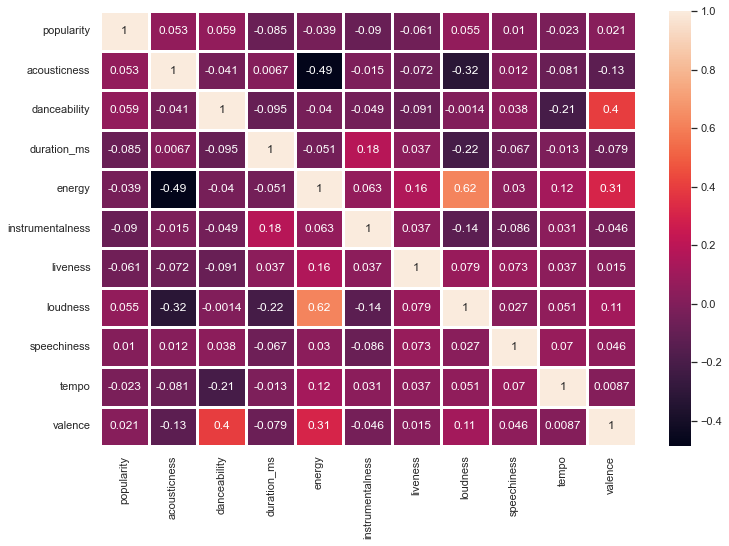

In [67]:
numericals, categoricals = numerical_features_most_related_with_popularity(df_group_2)

## Studying the numerical features that are mostly related with popularity

In [68]:
list = ['duration_ms','instrumentalness','liveness']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


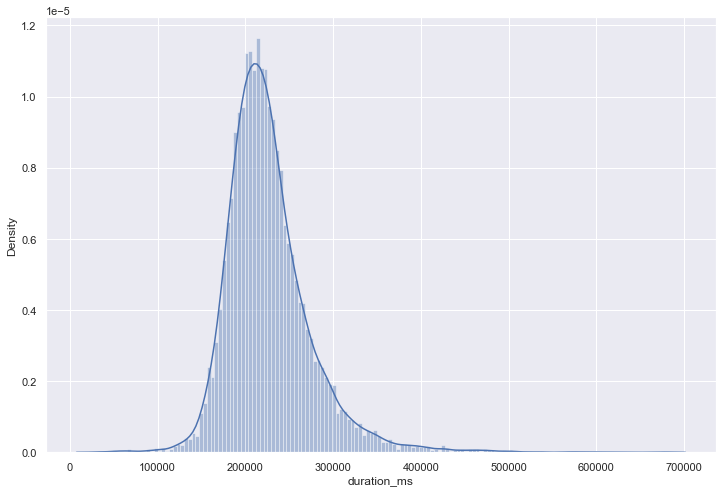

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


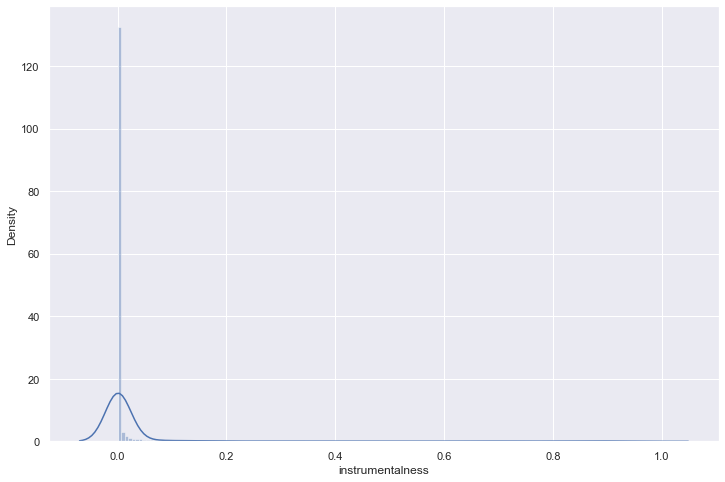

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


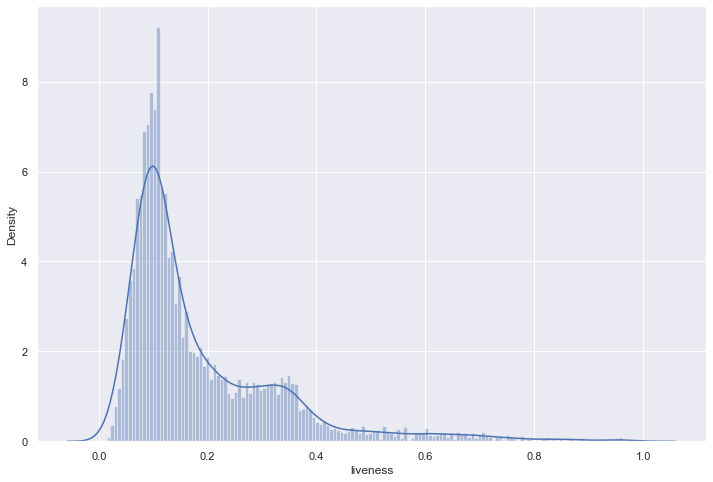

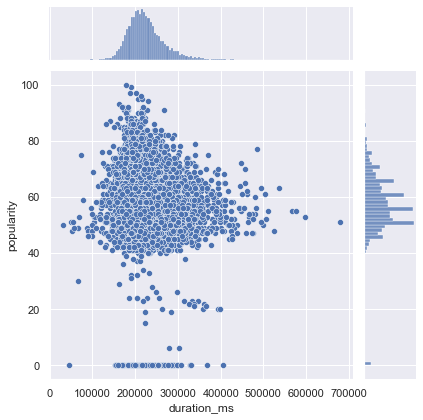

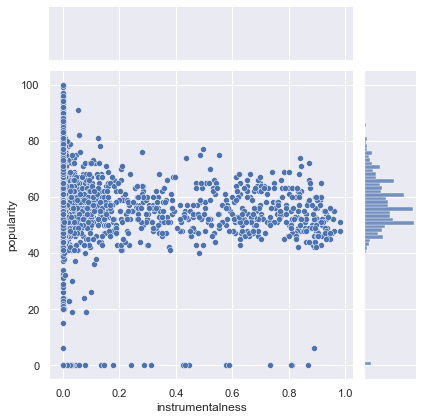

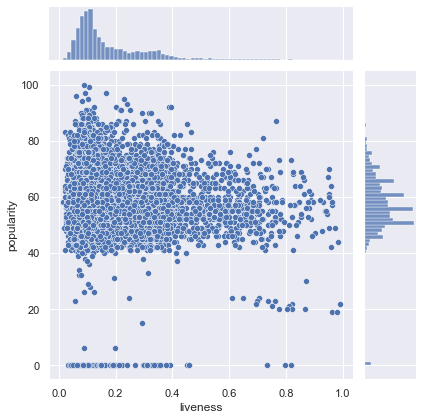

In [69]:
study_of_numerical_features_related_with_popularity(df_group_2)

## Looking more closely at popularity


### Looking at the correlation after eliminating popularity's outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


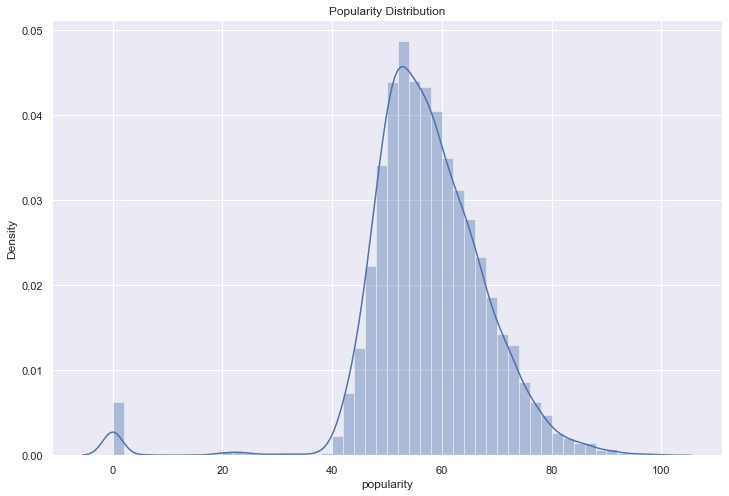

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


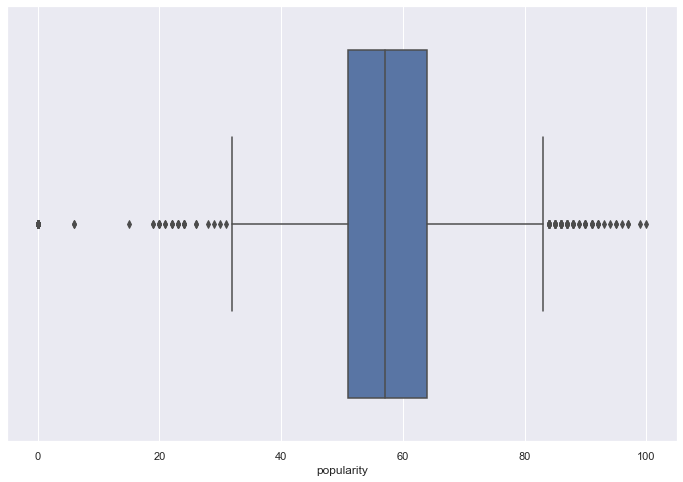

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


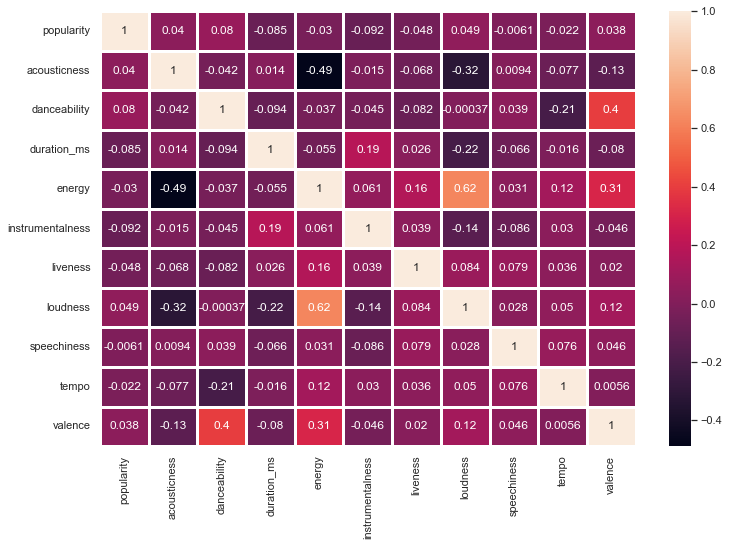

In [71]:
df_group_2_unnecesary = df_group_2.copy()
upper, lower, df_group_2_unnecesary = eliminate_outliers_of_popularity(df_group_2, numericals)

In [72]:
upper

64.0

In [73]:
# No improvement can be seen in the correlation

### Grouping popularity

In [74]:
# df_group_2_test = df_group_2.copy()

In [75]:
df_group_2['popularity'] = df_group_2['popularity'].apply(popularity_classification)


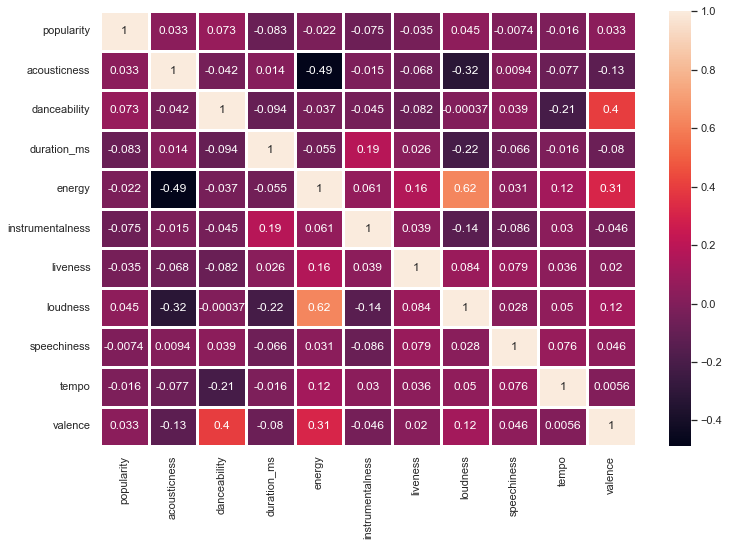

In [76]:
numericals_test = grouping_popularity(df_group_2)

In [77]:
# There is the same correlation for group 2 whether or not the popularity column is grouped. 

### Looking at the numerical features that are mostly related with popularity (now in binary mode)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


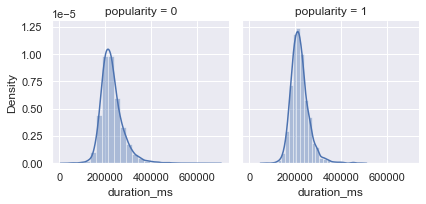

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


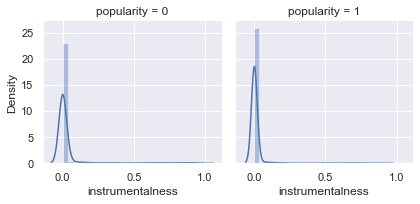

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


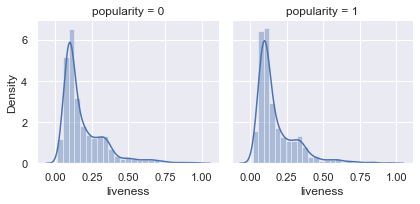

In [78]:
study_of_numerical_features_that_are_most_correlated(numericals_test, list)

### Looking at the categorical features

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


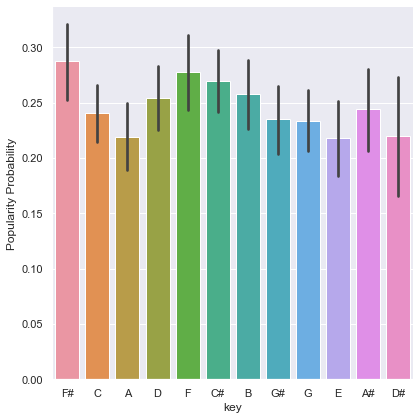

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


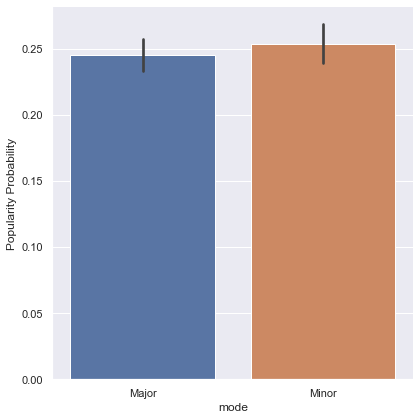

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


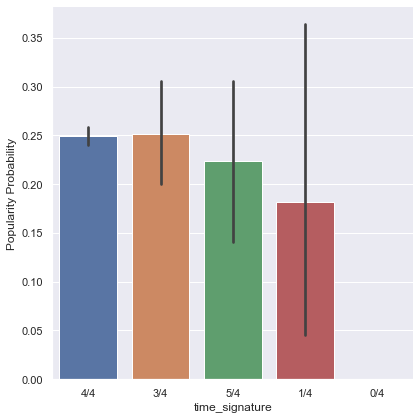

In [79]:
study_of_categorical_features(df_group_2)

In [80]:
df_group_2["key"] = (df_group_2["key"].map({"D" : 8, "F" : 11, "D#" : 2, "C#" : 10, "E" : 1, "C" : 6, "G" : 4, "A" : 3, "A#" : 7, "B" : 9, "G#" : 5, "F#" : 12})).astype('float')
df_group_2["mode"] = (df_group_2["mode"].map({"Minor" : 1, "Major" : 0})).astype('float')
df_group_2["time_signature"] = (df_group_2["time_signature"].map({"4/4" : 3, "3/4" : 4, "0/4" : 0, "1/4" : 1, "5/4" : 2})).astype('float')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


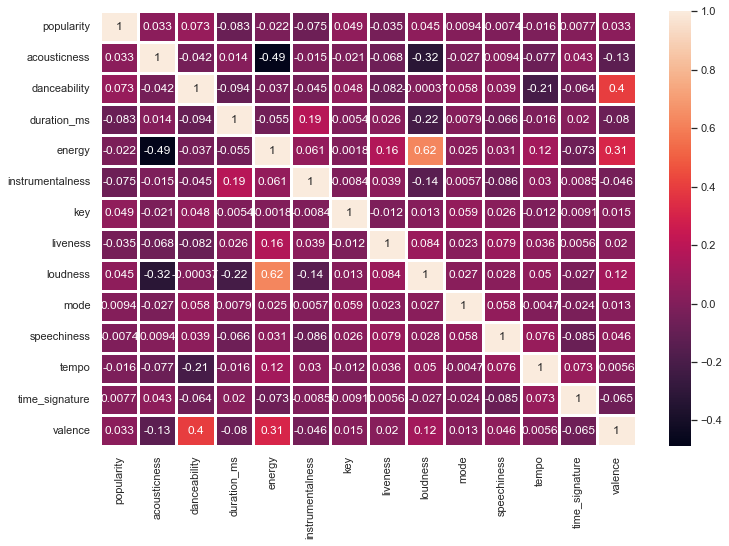

In [81]:
last_correlation_map(df_group_2)

### Modelling group 2

In [82]:
X = numericals_test.drop(['popularity'],axis=1)
y = numericals_test['popularity']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
transformer = StandardScaler().fit(X_train)
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)
    
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True) 

#### Logistic regression


In [83]:
logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test)

accuracy: 0.7506685543495359
precision:  0.0
recall:  0.0
[[1598    0]
 [ 522    0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
category_0 = numericals_test[numericals_test['popularity'] == 0]
category_1 = numericals_test[numericals_test['popularity'] == 1]

###### Downsampling

In [85]:
downsampling(category_0, category_1)

(2107, 11)
(2107, 11)
accuracy: 0.5664556962025317
precision:  0.5424292845257903
recall:  0.6317829457364341
[[263 275]
 [190 326]]


###### Upsampling

In [86]:
upsampling(category_0, category_1)

(6370, 11)
(6370, 11)
accuracy: 0.5716378859236002
precision:  0.5529347229840922
recall:  0.6331658291457286
[[ 778  815]
 [ 584 1008]]


#### Random Forest Classifier


In [87]:
get_best_Random_forrest(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 7, 'min_samples_leaf': 10, 'max_features': 6, 'max_depth': 4}


In [88]:
execute_Random_Forest(7,10,6,4,X_train_scaled, X_test_scaled, y_train, y_test)

0.7989617744218971


0    1598
1     522
Name: popularity, dtype: int64

precision:  0.3333333333333333
recall:  0.009578544061302681


array([[1588,   10],
       [ 517,    5]], dtype=int64)

###### Downsampling 

In [89]:
execute_Random_Forest_downsampling(7,10,6,4, category_0, category_1)

(2107, 11)
(2107, 11)
0.6338607594936709


1    535
0    519
Name: popularity, dtype: int64

precision:  0.5498392282958199
recall:  0.6392523364485981


array([[239, 280],
       [193, 342]], dtype=int64)

###### Upsampling 

In [90]:
execute_Random_Forest_upsampling(7,10,6,4, category_0, category_1)

(6370, 11)
(6370, 11)
0.6214547357404501


1    1634
0    1551
Name: popularity, dtype: int64

precision:  0.6047409040793826
recall:  0.671358629130967


array([[ 834,  717],
       [ 537, 1097]], dtype=int64)

#### Decision Tree Classifier


In [91]:
get_best_Decision_tree_classifier(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 9, 'min_samples_leaf': 8, 'max_features': 3, 'max_depth': 4}


In [92]:
execute_Decision_tree_classifier(9,8,3,4, X_train_scaled, X_test_scaled, y_train, y_test)


0.7506685543495359


0    1598
1     522
Name: popularity, dtype: int64

precision:  0.0
recall:  0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[1598,    0],
       [ 522,    0]], dtype=int64)

###### Downsampling 

In [93]:
execute_Decision_tree_classifier_downsampling(9,8,3,4, category_0, category_1)

(2107, 11)
(2107, 11)
0.5946202531645569


1    542
0    512
Name: popularity, dtype: int64

precision:  0.5490909090909091
recall:  0.5571955719557196


array([[264, 248],
       [240, 302]], dtype=int64)

###### Upsampling 

In [94]:
execute_Decision_tree_classifier_upsampling(9,8,3,4, category_0, category_1)

(6370, 11)
(6370, 11)
0.5798011512297226


0    1611
1    1574
Name: popularity, dtype: int64

precision:  0.5482603815937149
recall:  0.6207115628970775


array([[806, 805],
       [597, 977]], dtype=int64)

In [95]:
# Conclusion: For group 2 we take the Logistic Regression Upsampling (not the Random Forest because I take it as an unreliable 
# result)

# Looking at group 3

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


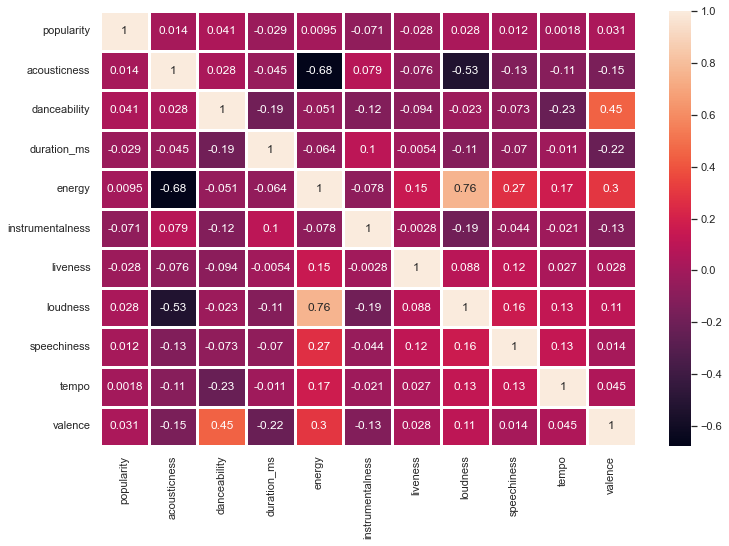

In [96]:
numericals, categoricals = numerical_features_most_related_with_popularity(df_group_3)

## Studying the numerical features that are mostly related with popularity

In [97]:
list = ['danceability','instrumentalness']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


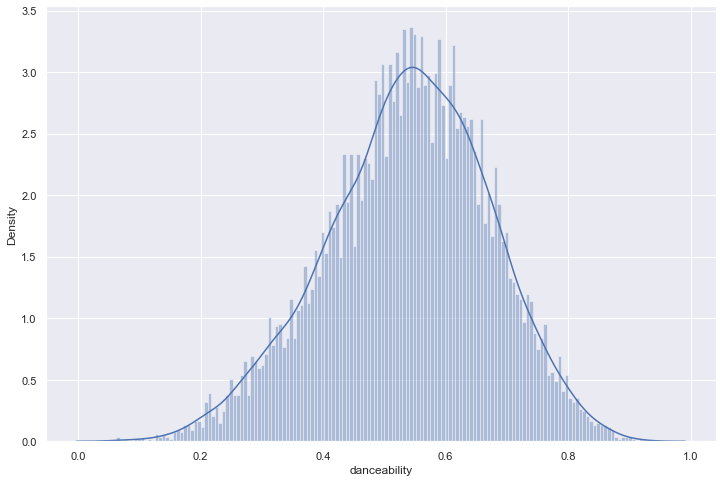

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


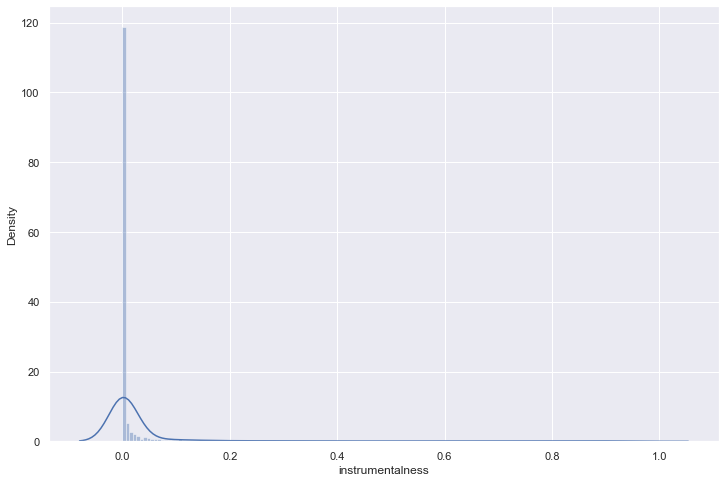

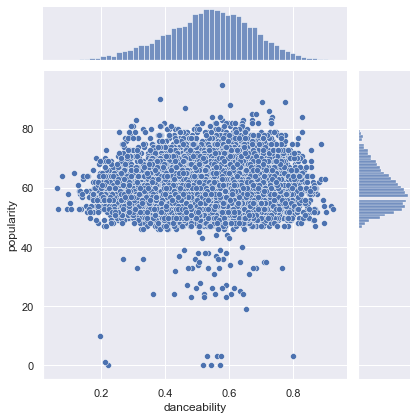

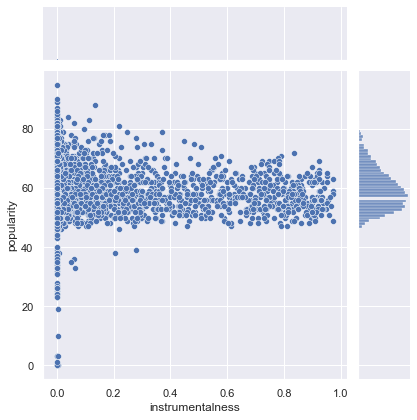

In [98]:
study_of_numerical_features_related_with_popularity(df_group_3)

## Looking more closely at popularity

### Looking at the correlation after eliminating popularity's outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


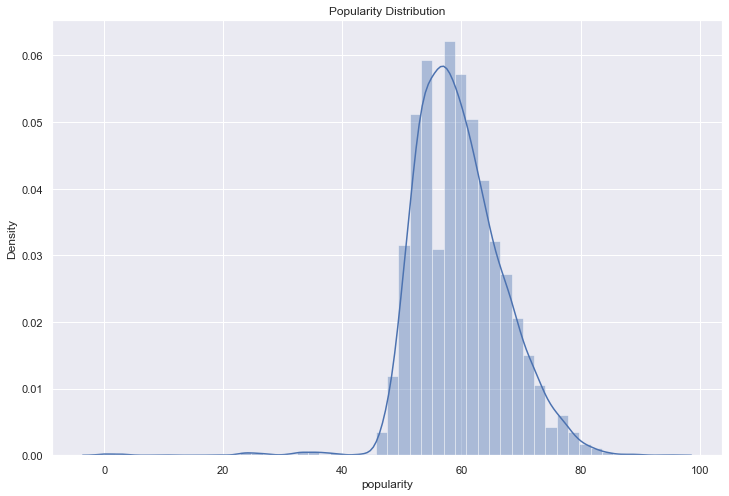

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


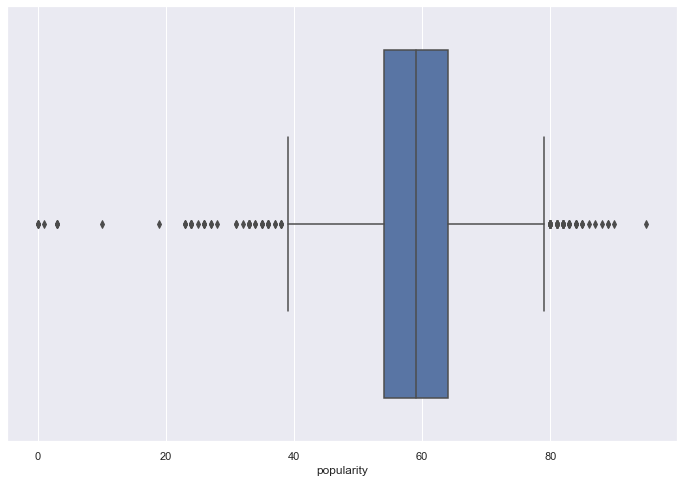

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


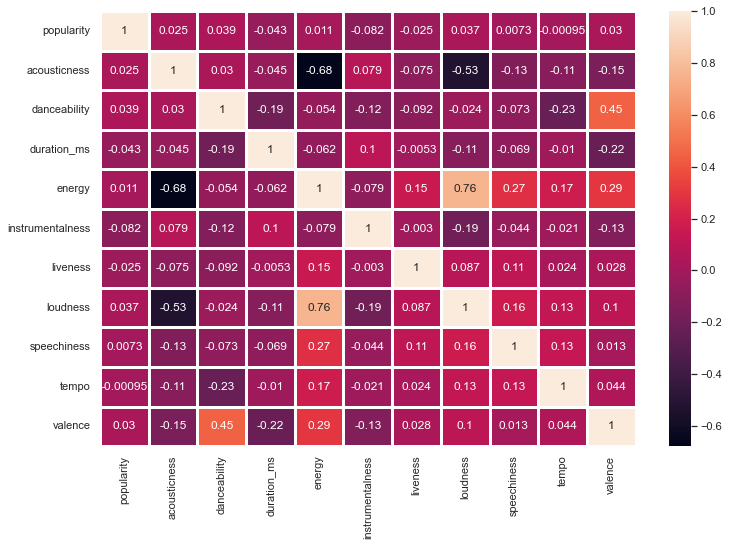

In [100]:
df_group_3_unnecesary = df_group_3.copy()
upper, lower, df_group_3_unnecesary = eliminate_outliers_of_popularity(df_group_3, numericals)

In [101]:
upper

64.0

In [102]:
# No improvement can be seen in the correlation

### Grouping popularity

In [103]:
# df_group_3_test = df_group_3.copy()

In [104]:
df_group_3['popularity'] = df_group_3['popularity'].apply(popularity_classification)


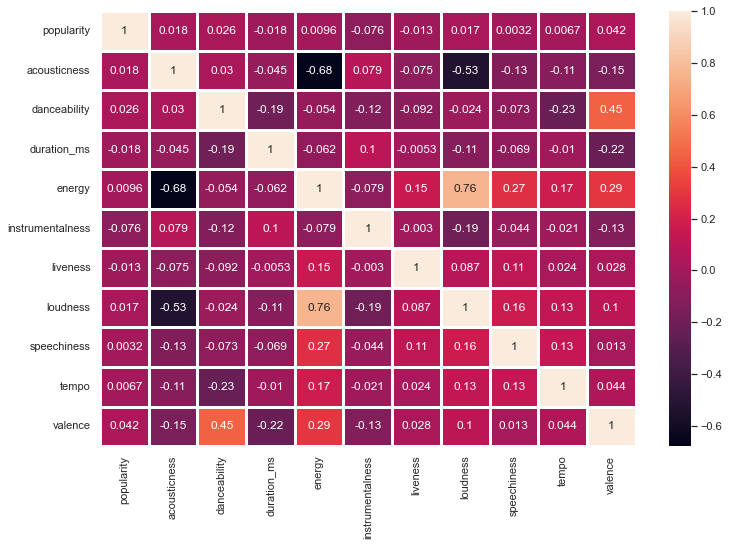

In [105]:
numericals_test = grouping_popularity(df_group_3)

In [106]:
# There is the same correlation for group 3 whether or not the popularity column is grouped. 

### Looking at the numerical features that are mostly related with popularity (now in binary mode)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


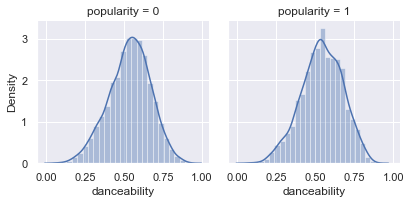

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


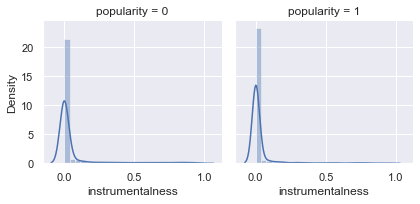

In [107]:
study_of_numerical_features_that_are_most_correlated(numericals_test, list)

### Looking at the categorical features

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


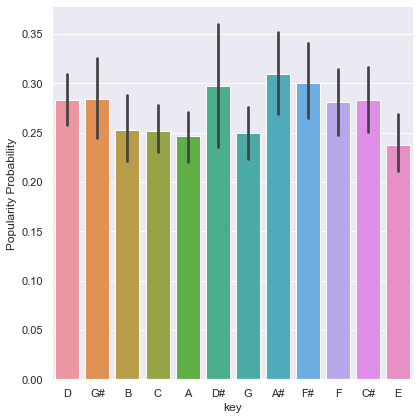

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


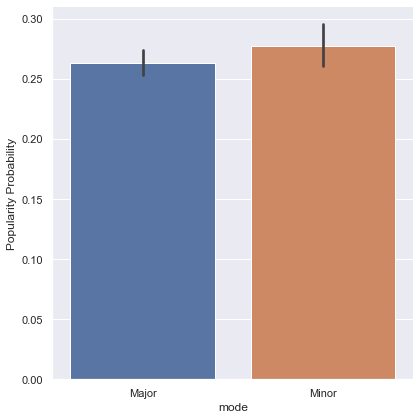

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


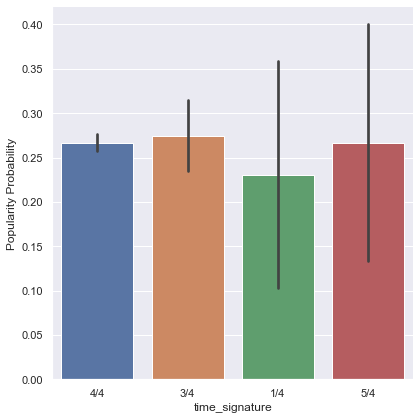

In [108]:
study_of_categorical_features(df_group_3)

In [109]:
df_group_3["key"] = (df_group_3["key"].map({"D" : 8 , "F" : 6, "D#" : 10, "C#" : 9, "E" : 1, "C" : 4, "G" : 3, "A" : 2, "A#" : 12, "B" : 5, "G#" : 7, "F#" : 11})).astype('float')
df_group_3["mode"] = (df_group_3["mode"].map({"Minor" : 1, "Major" : 0})).astype('float')
df_group_3["time_signature"] = (df_group_3["time_signature"].map({"4/4" : 2, "3/4" : 4, "1/4" : 1, "5/4" : 3})).astype('float')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


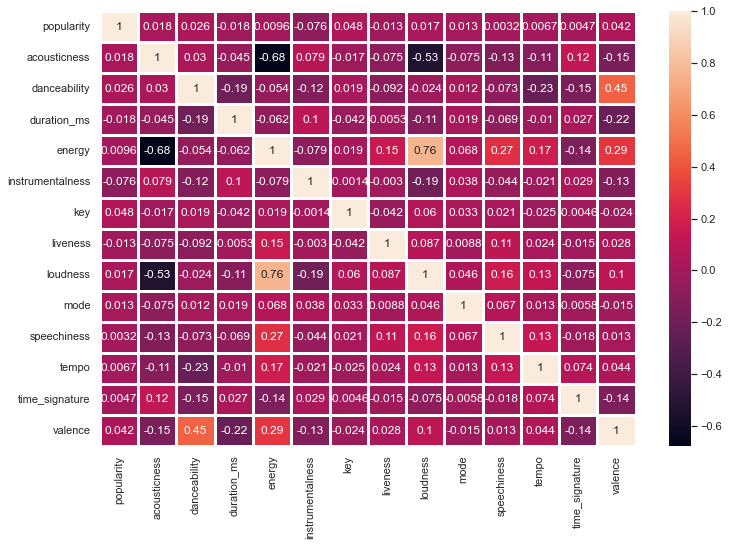

In [110]:
last_correlation_map(df_group_3)

### Modelling group 3

In [111]:
X = numericals_test.drop(['popularity'],axis=1)
y = numericals_test['popularity']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
transformer = StandardScaler().fit(X_train)
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)
    
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True) 

#### Logistic regression

In [112]:
logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test)

accuracy: 0.73184275902382
precision:  0.0
recall:  0.0
[[1680    0]
 [ 601    0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
category_0 = numericals_test[numericals_test['popularity'] == 0]
category_1 = numericals_test[numericals_test['popularity'] == 1]

###### Downsampling

In [114]:
downsampling(category_0, category_1)

(2436, 11)
(2436, 11)
accuracy: 0.5539135194307608
precision:  0.48634590377113135
recall:  0.6481802426343154
[[246 395]
 [203 374]]


###### Upsampling

In [115]:
upsampling(category_0, category_1)

(6688, 11)
(6688, 11)
accuracy: 0.5314992025518341
precision:  0.531009738595592
recall:  0.6166666666666667
[[ 749  915]
 [ 644 1036]]


#### Random Forest Classifier


In [116]:
get_best_Random_forrest(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 5, 'max_depth': 3}


In [117]:
execute_Random_Forest(5,3,5,3,X_train_scaled, X_test_scaled, y_train, y_test)

0.9796872716644747


0    1680
1     601
Name: popularity, dtype: int64

precision:  0.37037037037037035
recall:  0.016638935108153077


array([[1663,   17],
       [ 591,   10]], dtype=int64)

###### Downsampling 

In [118]:
execute_Random_Forest_downsampling(5,3,5,3, category_0, category_1)

(2436, 11)
(2436, 11)
0.5834701696770662


0    616
1    602
Name: popularity, dtype: int64

precision:  0.50920245398773
recall:  0.6893687707641196


array([[216, 400],
       [187, 415]], dtype=int64)

###### Upsampling 

In [119]:
execute_Random_Forest_upsampling(5,3,5,3, category_0, category_1)

(6688, 11)
(6688, 11)
0.5655901116427432


0    1690
1    1654
Name: popularity, dtype: int64

precision:  0.5251968503937008
recall:  0.8065296251511487


array([[ 484, 1206],
       [ 320, 1334]], dtype=int64)

#### Decision Tree Classifier


In [120]:
get_best_Decision_tree_classifier(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 3, 'max_depth': 3}


In [121]:
execute_Decision_tree_classifier(9,4,3,3, X_train_scaled, X_test_scaled, y_train, y_test)


0.7319888937600467


0    1680
1     601
Name: popularity, dtype: int64

precision:  0.0
recall:  0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[1680,    0],
       [ 601,    0]], dtype=int64)

###### Downsampling 

In [122]:
execute_Decision_tree_classifier_downsampling(9,4,3,3, category_0, category_1)

(2436, 11)
(2436, 11)
0.5385878489326765


1    620
0    598
Name: popularity, dtype: int64

precision:  0.4981949458483754
recall:  0.22258064516129034


array([[459, 139],
       [482, 138]], dtype=int64)

###### Upsampling 

In [123]:
execute_Decision_tree_classifier_upsampling(9,4,3,3, category_0, category_1)

(6688, 11)
(6688, 11)
0.5486443381180224


0    1685
1    1659
Name: popularity, dtype: int64

precision:  0.5439377085650723
recall:  0.29475587703435807


array([[1275,  410],
       [1170,  489]], dtype=int64)

In [124]:
# Conclusion: For group 3 we take the Logistic Regression Upsampling (not the Random Forest because I take it as an unreliable 
# result)

# Looking at group 4


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


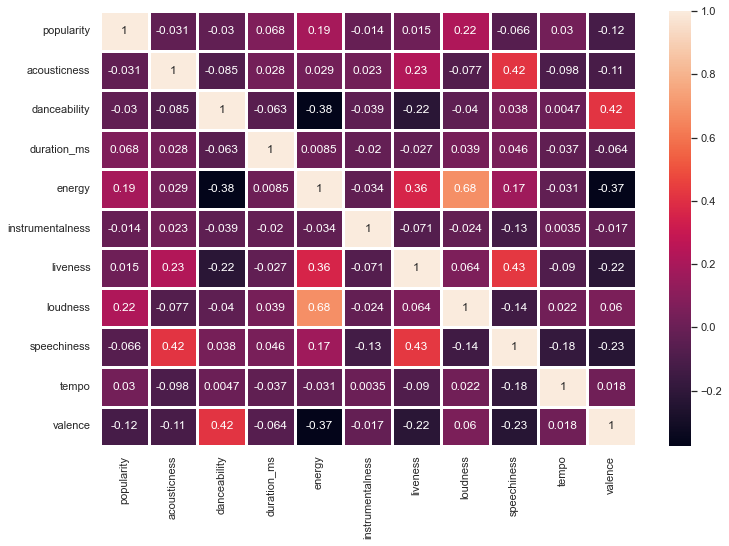

In [125]:
numericals, categoricals = numerical_features_most_related_with_popularity(df_group_4)

## Studying the numerical features that are mostly related with popularity

In [126]:
list = ['duration_ms','energy', 'loudness']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


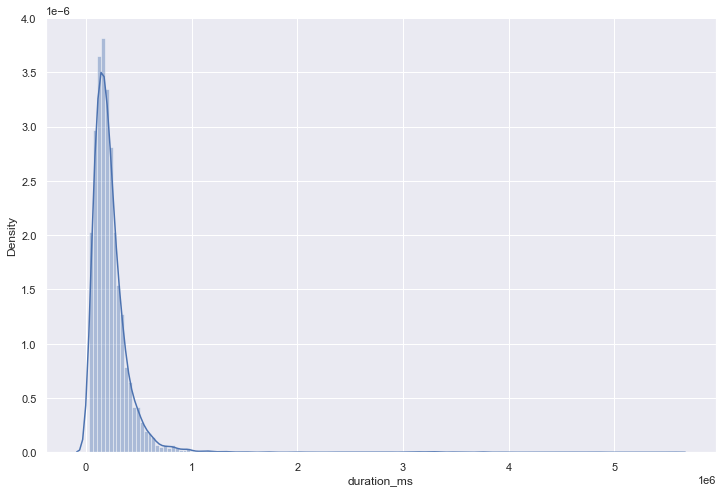

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


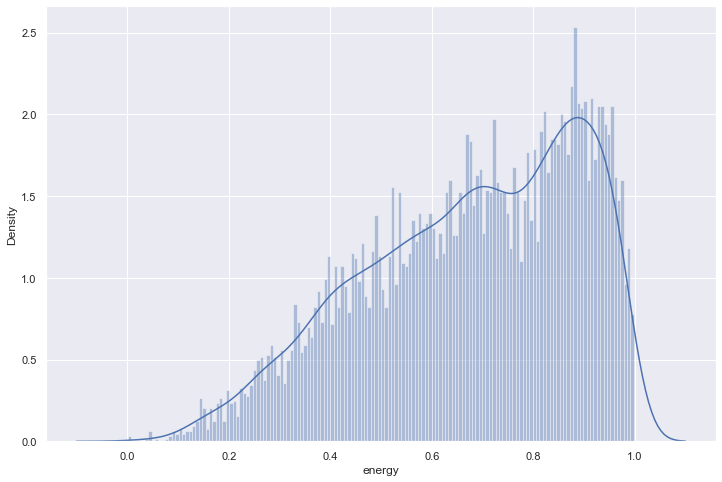

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


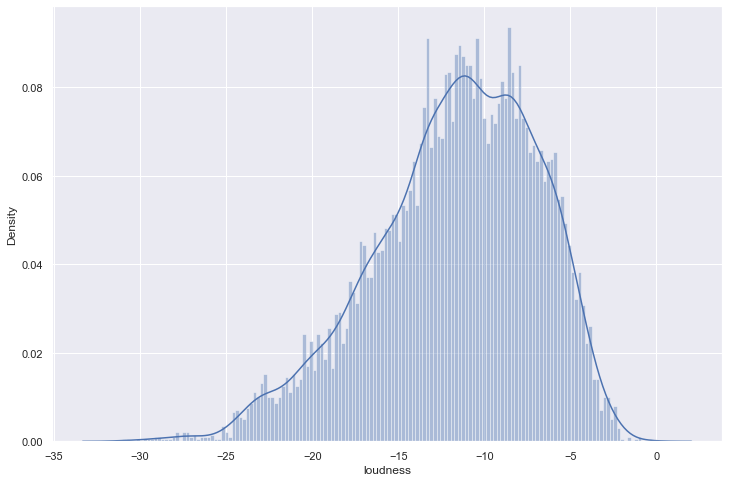

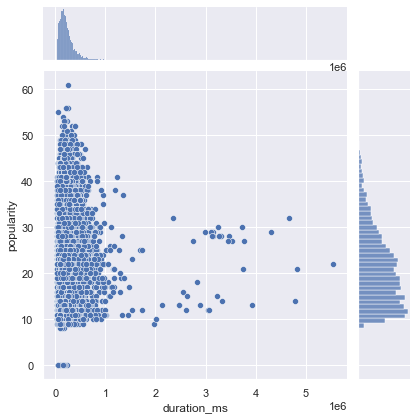

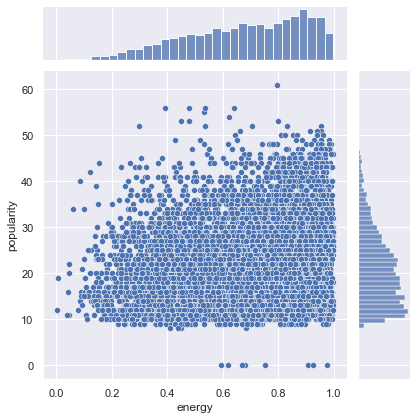

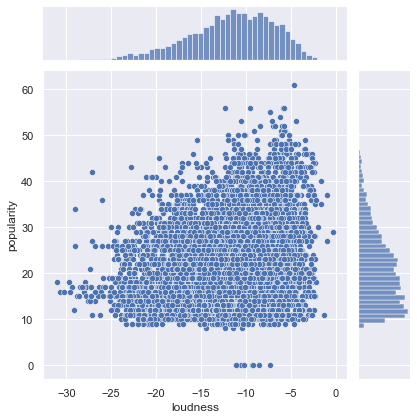

In [127]:
study_of_numerical_features_related_with_popularity(df_group_4)

## Looking more closely at popularity

### Looking at the correlation after eliminating popularity's outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


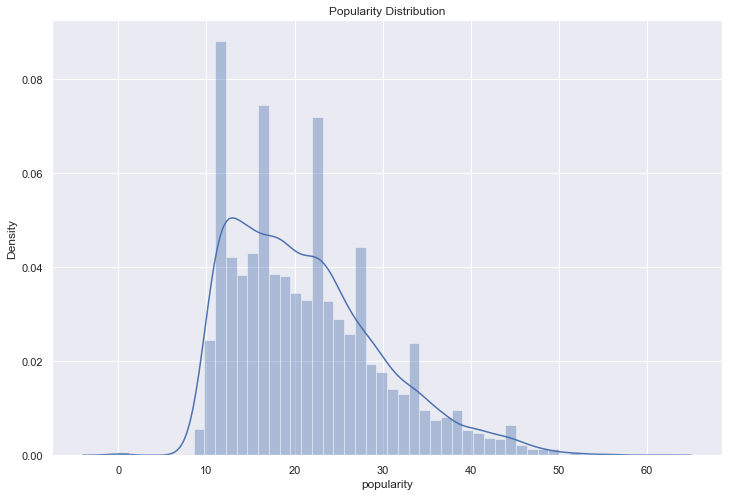

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


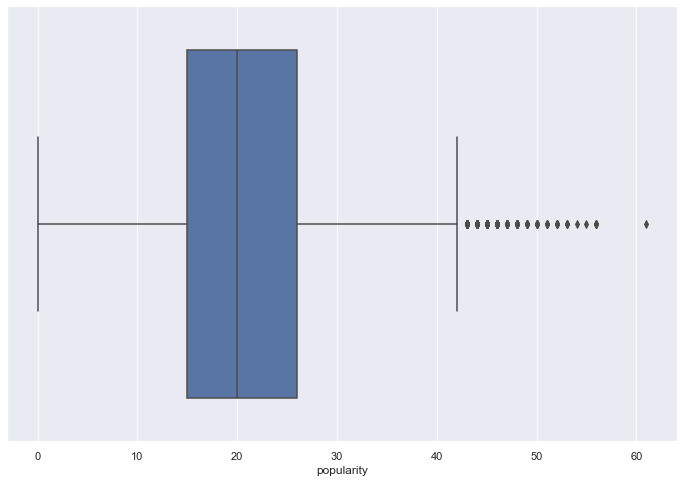

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


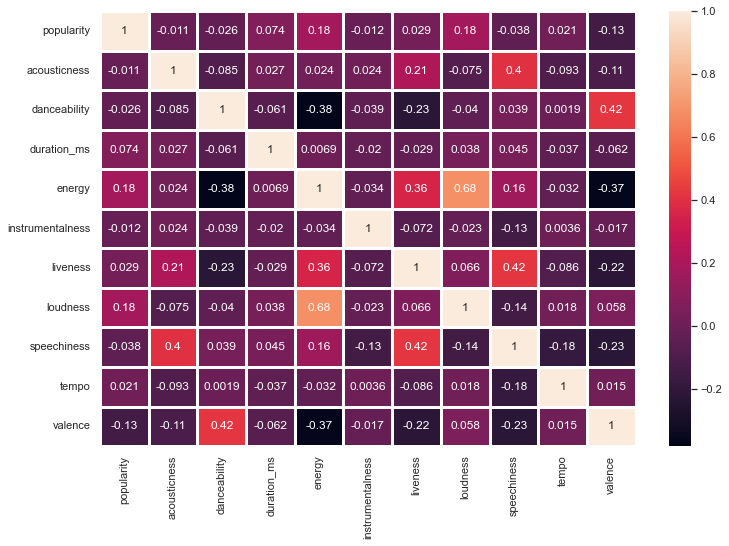

In [128]:
df_group_4_unnecesary = df_group_4.copy()
upper, lower, df_group_4_unnecesary = eliminate_outliers_of_popularity(df_group_4, numericals)

In [129]:
# No improvement can be seen in the correlation

### Grouping popularity

In [130]:
# df_group_4_test = df_group_4.copy()

In [131]:
df_group_4['popularity'] = df_group_4['popularity'].apply(popularity_classification)


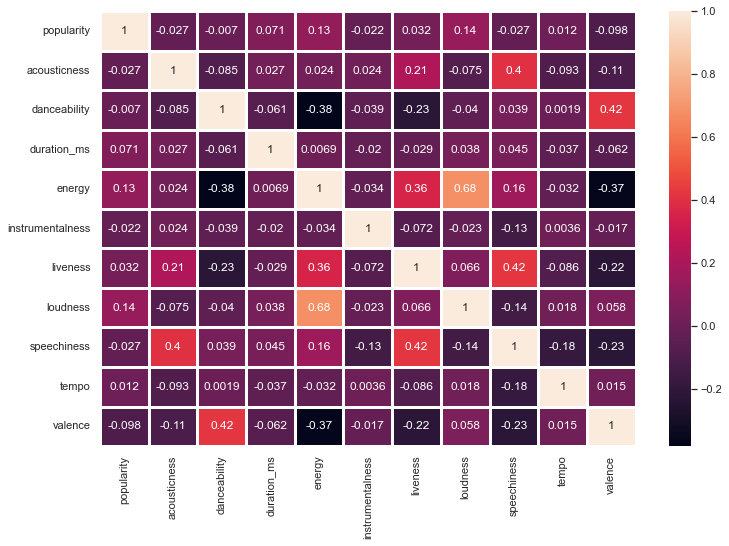

In [132]:
numericals_test = grouping_popularity(df_group_4)

In [133]:
# There is the same correlation for group 1 whether or not the popularity column is grouped. 

### Looking at the numerical features that are mostly related with popularity (now in binary mode)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


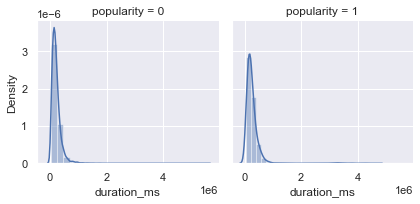

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


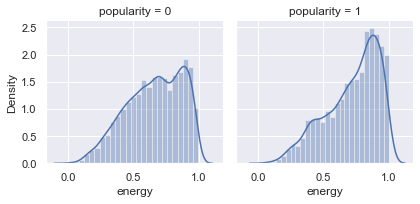

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


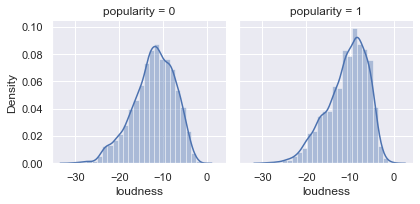

In [134]:
study_of_numerical_features_that_are_most_correlated(numericals_test, list)

### Looking at the categorical features

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


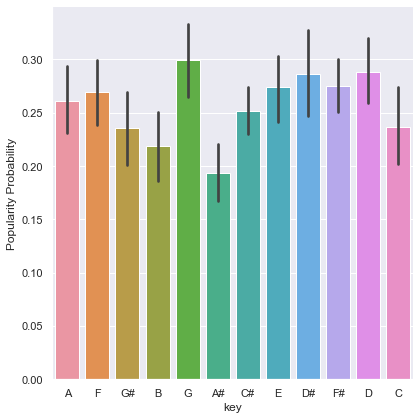

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


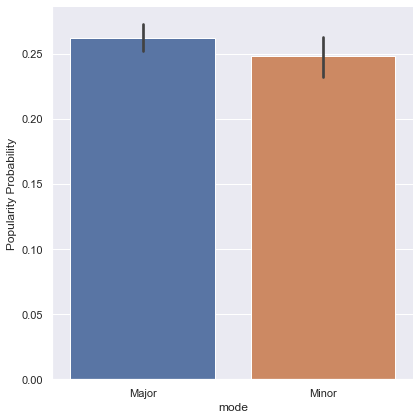

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


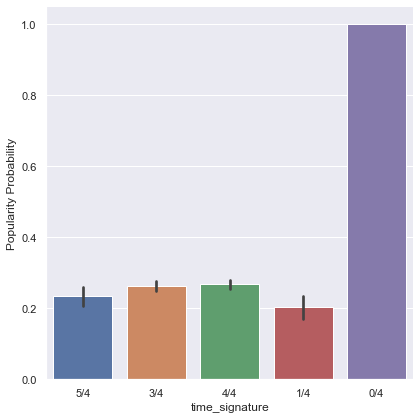

In [135]:
study_of_categorical_features(df_group_4)

In [136]:
df_group_4["key"] = (df_group_4["key"].map({"D" : 11, "F" : 7, "D#" : 10, "C#" : 5, "E" : 8, "C" : 4, "G" : 12, "A" : 6, "A#" : 1, "B" : 2, "G#" : 3, "F#" : 9})).astype('float')
df_group_4["mode"] = (df_group_4["mode"].map({"Minor" : 0, "Major" : 1})).astype('float')
df_group_4["time_signature"] = (df_group_4["time_signature"].map({"4/4" : 4, "3/4" : 3, "1/4" : 1, "5/4" : 2, "0/4" : 5})).astype('float')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


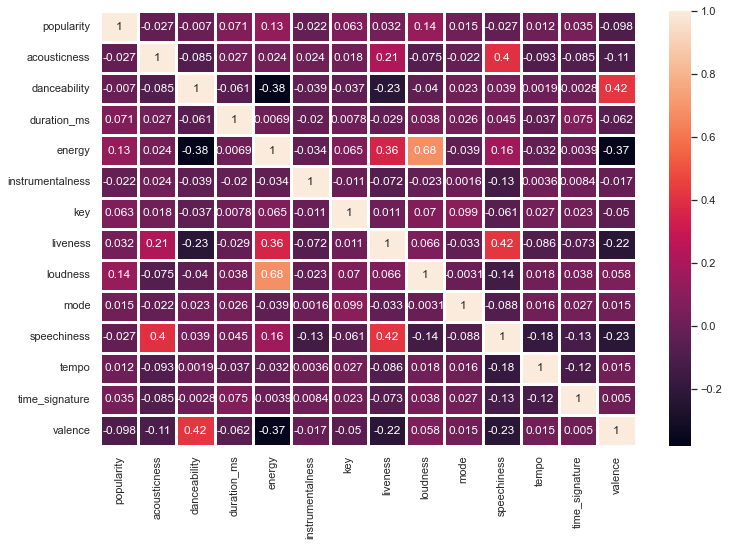

In [137]:
last_correlation_map(df_group_4)

### Modelling group 4

In [138]:
X = numericals_test.drop(['popularity'],axis=1)
y = numericals_test['popularity']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
transformer = StandardScaler().fit(X_train)
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)
    
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True) 

#### Logistic regression

In [139]:
logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test)

accuracy: 0.7449324324324325
precision:  0.5714285714285714
recall:  0.0128
[[1738    6]
 [ 617    8]]


In [140]:
category_0 = numericals_test[numericals_test['popularity'] == 0]
category_1 = numericals_test[numericals_test['popularity'] == 1]

###### Downsampling

In [141]:
downsampling(category_0, category_1)

(2445, 11)
(2445, 11)
accuracy: 0.5977638396509408
precision:  0.5700787401574803
recall:  0.6013289036544851
[[348 273]
 [240 362]]


###### Upsampling

In [142]:
upsampling(category_0, category_1)

(7028, 11)
(7028, 11)
accuracy: 0.5942895086321381
precision:  0.6003353828954723
recall:  0.6064370412196499
[[1028  715]
 [ 697 1074]]


#### Random Forest Classifier


In [143]:
get_best_Random_forrest(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 4, 'max_depth': None}


In [144]:
execute_Random_Forest(9,4,4,None,X_train_scaled, X_test_scaled, y_train, y_test)

0.9227195945945946


0    1744
1     625
Name: popularity, dtype: int64

precision:  0.7047619047619048
recall:  0.1184


array([[1713,   31],
       [ 551,   74]], dtype=int64)

###### Downsampling 

In [145]:
execute_Random_Forest_downsampling(9,4,4,None, category_0, category_1)

(2445, 11)
(2445, 11)
0.9713662394327789


1    628
0    595
Name: popularity, dtype: int64

precision:  0.6326530612244898
recall:  0.5923566878980892


array([[379, 216],
       [256, 372]], dtype=int64)

###### Upsampling 

In [146]:
execute_Random_Forest_upsampling(9,4,4,None, category_0, category_1)

(7028, 11)
(7028, 11)
0.9912730032251945


1    1793
0    1721
Name: popularity, dtype: int64

precision:  0.8466771323914181
recall:  0.9023982152816509


array([[1428,  293],
       [ 175, 1618]], dtype=int64)

#### Decision Tree Classifier


In [147]:
get_best_Decision_tree_classifier(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 3}


In [148]:
execute_Decision_tree_classifier(9,3,3,3, X_train_scaled, X_test_scaled, y_train, y_test)


0.7464808558558559


0    1744
1     625
Name: popularity, dtype: int64

precision:  0.5652173913043478
recall:  0.0208


array([[1734,   10],
       [ 612,   13]], dtype=int64)

###### Downsampling 

In [149]:
execute_Decision_tree_classifier_downsampling(9,3,3,3, category_0, category_1)

(2445, 11)
(2445, 11)
0.5887646577583856


1    621
0    602
Name: popularity, dtype: int64

precision:  0.5436081242532855
recall:  0.7326892109500805


array([[220, 382],
       [166, 455]], dtype=int64)

###### Upsampling 

In [150]:
execute_Decision_tree_classifier_upsampling(9,3,3,3, category_0, category_1)

(7028, 11)
(7028, 11)
0.5758869284765699


1    1775
0    1739
Name: popularity, dtype: int64

precision:  0.5658914728682171
recall:  0.6169014084507042


array([[ 899,  840],
       [ 680, 1095]], dtype=int64)

In [151]:
# Conclusion: For group 4 we take the Logistic Regression Upsampling (not the Random Forest because I take it as an unreliable 
# result)

# Looking at group 5

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


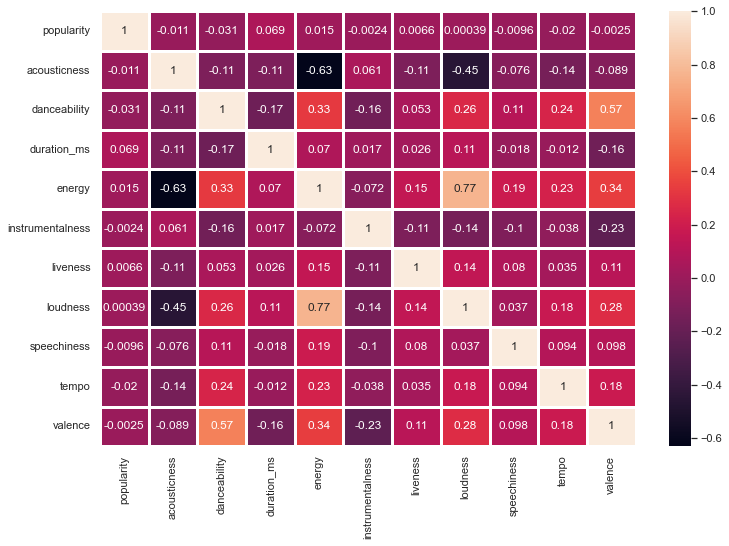

In [152]:
numericals, categoricals = numerical_features_most_related_with_popularity(df_group_5)

In [153]:
list = ['duration_ms']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


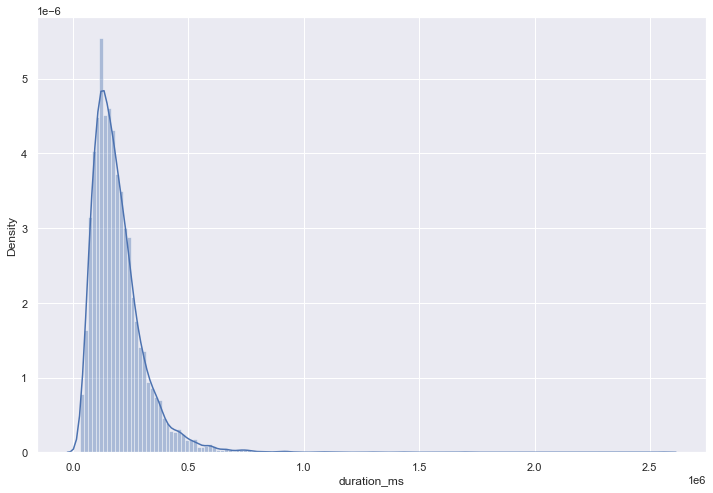

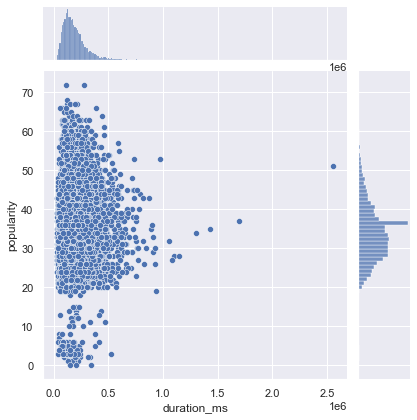

In [154]:
study_of_numerical_features_related_with_popularity(df_group_5)

## Looking more closely at popularity


### Looking at the correlation after eliminating popularity's outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


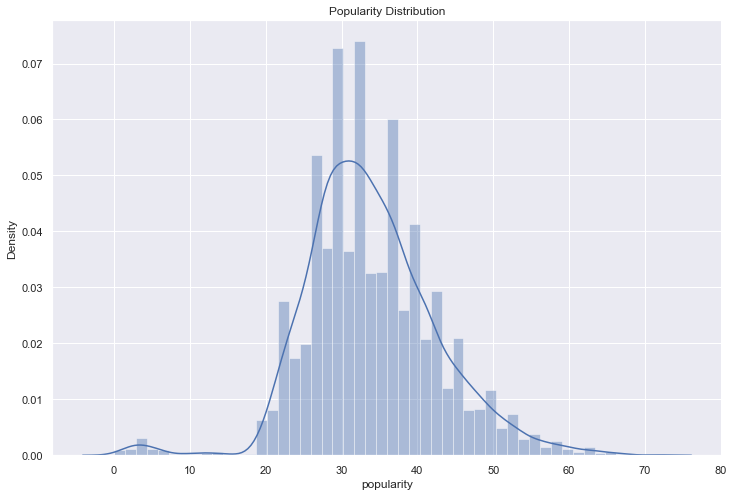

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


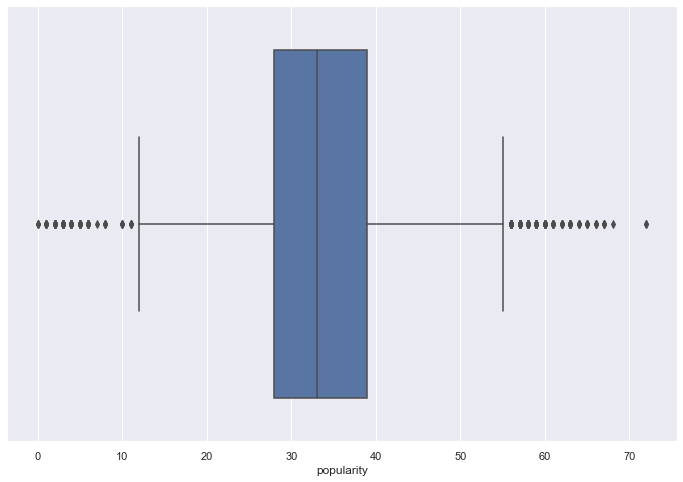

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


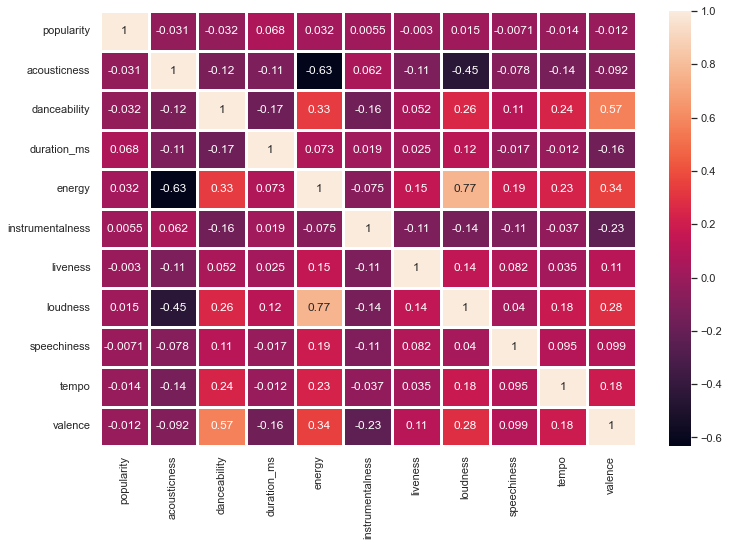

In [155]:
df_group_5_unnecesary = df_group_5.copy()
upper, lower, df_group_5_unnecesary = eliminate_outliers_of_popularity(df_group_5, numericals)

In [156]:
# Results are very similar

In [157]:
# df_group_5_test = df_group_5.copy()

In [158]:
df_group_5['popularity'] = df_group_5['popularity'].apply(popularity_classification)

C:\Users\Usuario\AppData\Local\Temp/ipykernel_16456/1987133336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_5['popularity'] = df_group_5['popularity'].apply(popularity_classification)


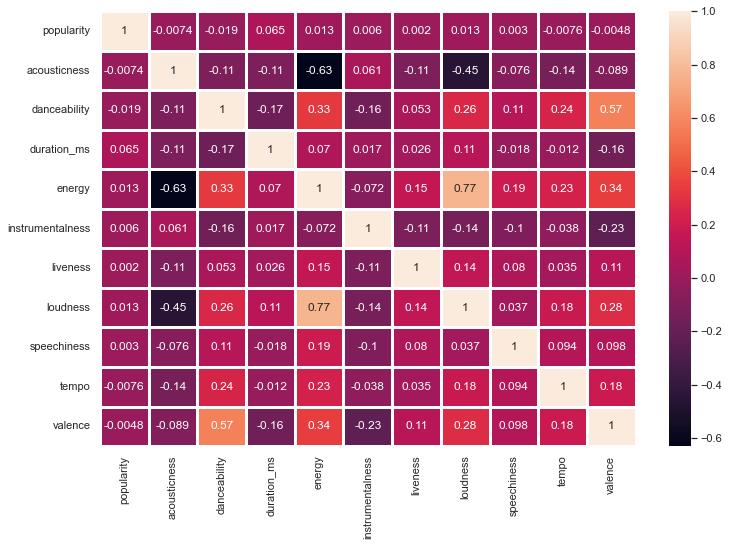

In [159]:
numericals_test = grouping_popularity(df_group_5)

In [160]:
# There is the same correlation for group 5 whether or not the popularity column is grouped. 

### Looking at the numerical features that are mostly related with popularity (now in binary mode)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


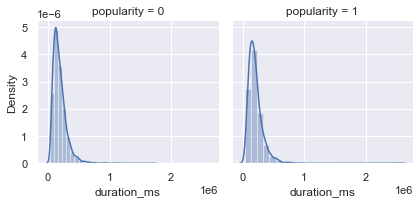

In [161]:
study_of_numerical_features_that_are_most_correlated(numericals_test, list)

### Looking at the categorical features

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


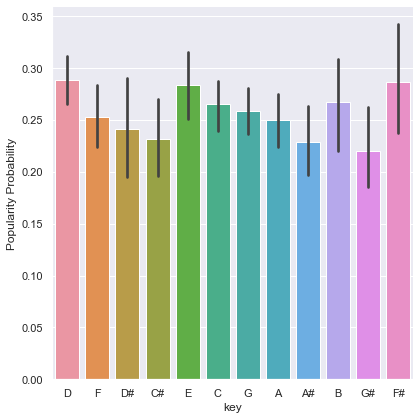

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


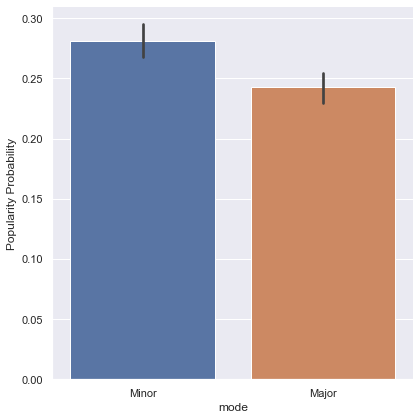

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


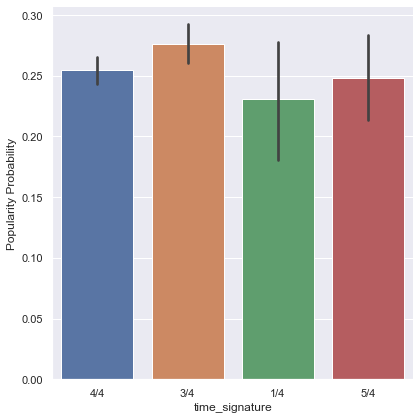

In [162]:
study_of_categorical_features(df_group_5)

In [163]:
df_group_5["key"] = (df_group_5["key"].map({"D" : 12, "F" : 6, "D#" : 4, "C#" : 3, "E" : 10, "C" : 8, "G" : 7, "A" : 5, "A#" : 2, "B" : 9, "G#" : 1, "F#" : 11})).astype('float')
df_group_5["mode"] = (df_group_5["mode"].map({"Minor" : 1, "Major" : 0})).astype('float')
df_group_5["time_signature"] = (df_group_5["time_signature"].map({"4/4" : 3, "3/4" : 4, "1/4" : 1, "5/4" : 2})).astype('float')


C:\Users\Usuario\AppData\Local\Temp/ipykernel_16456/3075173778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_5["key"] = (df_group_5["key"].map({"D" : 12, "F" : 6, "D#" : 4, "C#" : 3, "E" : 10, "C" : 8, "G" : 7, "A" : 5, "A#" : 2, "B" : 9, "G#" : 1, "F#" : 11})).astype('float')
C:\Users\Usuario\AppData\Local\Temp/ipykernel_16456/3075173778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_5["mode"] = (df_group_5["mode"].map({"Minor" : 1, "Major" : 0})).astype('float')
C:\Users\Usuar

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


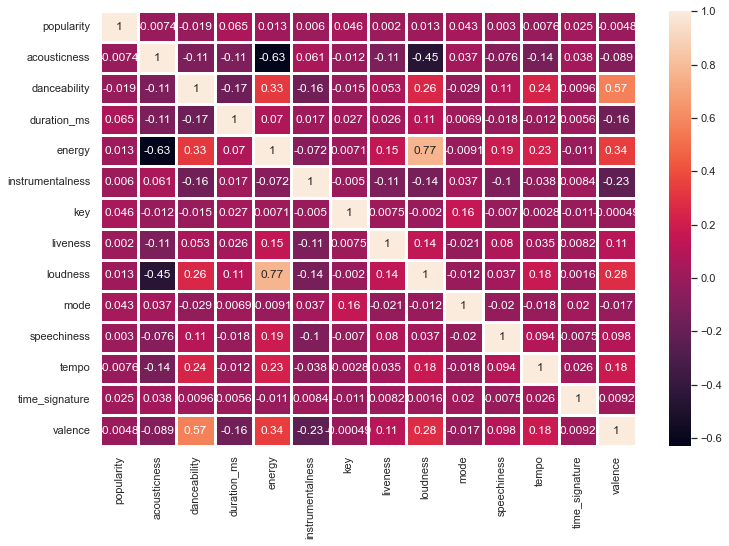

In [164]:
last_correlation_map(df_group_5)

### Modelling group 5


In [165]:
X = numericals_test.drop(['popularity'],axis=1)
y = numericals_test['popularity']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
transformer = StandardScaler().fit(X_train)
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)
    
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True) 

#### Logistic regression


In [166]:
logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test)

accuracy: 0.7390102294719381
precision:  0.0
recall:  0.0
[[1792    0]
 [ 620    0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Managing imbalance in the dataset

In [167]:
category_0 = numericals_test[numericals_test['popularity'] == 0]
category_1 = numericals_test[numericals_test['popularity'] == 1]

###### Downsampling

In [168]:
downsampling(category_0, category_1)

(2506, 11)
(2506, 11)
accuracy: 0.5424314977387603
precision:  0.5113043478260869
recall:  0.4704
[[347 281]
 [331 294]]


###### Upsampling

In [169]:
upsampling(category_0, category_1)

(7140, 11)
(7140, 11)
accuracy: 0.538562091503268
precision:  0.5372522214627478
recall:  0.4371523915461624
[[1095  677]
 [1012  786]]


#### Random Forest Classifier


In [170]:
get_best_Random_forrest(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 2, 'max_depth': None}


In [171]:
execute_Random_Forest(6,6,2,None,X_train_scaled, X_test_scaled, y_train, y_test)

0.7952723251313243


0    1792
1     620
Name: popularity, dtype: int64

precision:  0.5714285714285714
recall:  0.0064516129032258064


array([[1789,    3],
       [ 616,    4]], dtype=int64)

###### Downsampling 

In [172]:
execute_Random_Forest_downsampling(6,6,2,None, category_0, category_1)

(2506, 11)
(2506, 11)
0.9654163341314179


0    631
1    622
Name: popularity, dtype: int64

precision:  0.5313001605136437
recall:  0.5321543408360129


array([[339, 292],
       [291, 331]], dtype=int64)

###### Upsampling 

In [173]:
execute_Random_Forest_upsampling(6,6,2,None, category_0, category_1)

(7140, 11)
(7140, 11)
0.9831932773109243


0    1835
1    1735
Name: popularity, dtype: int64

precision:  0.8269337785197551
recall:  0.8564841498559078


array([[1524,  311],
       [ 249, 1486]], dtype=int64)

#### Decision Tree Classifier

In [174]:
get_best_Decision_tree_classifier(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 2, 'max_depth': 3}


In [175]:
execute_Decision_tree_classifier(5,9,2,3, X_train_scaled, X_test_scaled, y_train, y_test)


0.7401161183301078


0    1792
1     620
Name: popularity, dtype: int64

precision:  0.2857142857142857
recall:  0.0032258064516129032


array([[1787,    5],
       [ 618,    2]], dtype=int64)

###### Downsampling 

In [176]:
execute_Decision_tree_classifier_downsampling(5,9,2,3, category_0, category_1)

(2506, 11)
(2506, 11)
0.5469539771215749


1    635
0    618
Name: popularity, dtype: int64

precision:  0.5396039603960396
recall:  0.6866141732283465


array([[246, 372],
       [199, 436]], dtype=int64)

###### Upsampling 

In [177]:
execute_Decision_tree_classifier_upsampling(5,9,2,3, category_0, category_1)

(7140, 11)
(7140, 11)
0.5476190476190477


0    1827
1    1743
Name: popularity, dtype: int64

precision:  0.5079796264855687
recall:  0.8582903040734366


array([[ 378, 1449],
       [ 247, 1496]], dtype=int64)

In [178]:
# Conclusion: For group 5 we take the Logistic Regression Downsampling (not the Random Forest because I take it as an unreliable 
# result)

# Looking at group 6

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


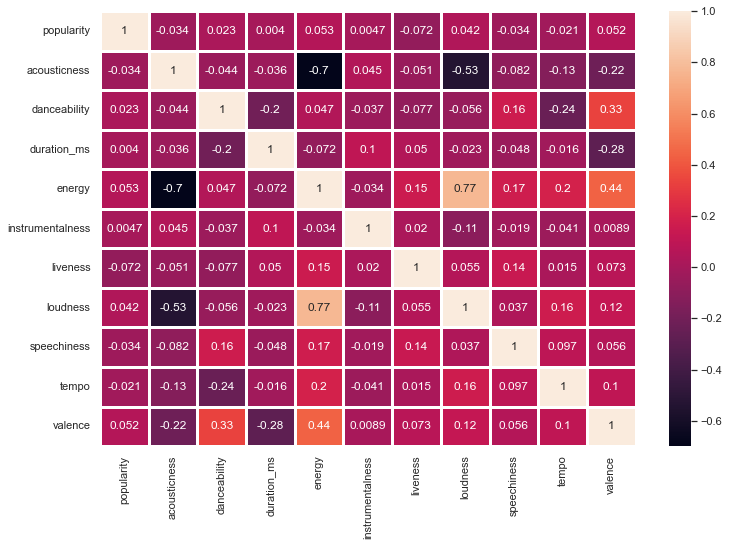

In [179]:
numericals, categoricals = numerical_features_most_related_with_popularity(df_group_6)

## Studying the numerical features that are mostly related with popularity


In [180]:
list = ['energy','liveness']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


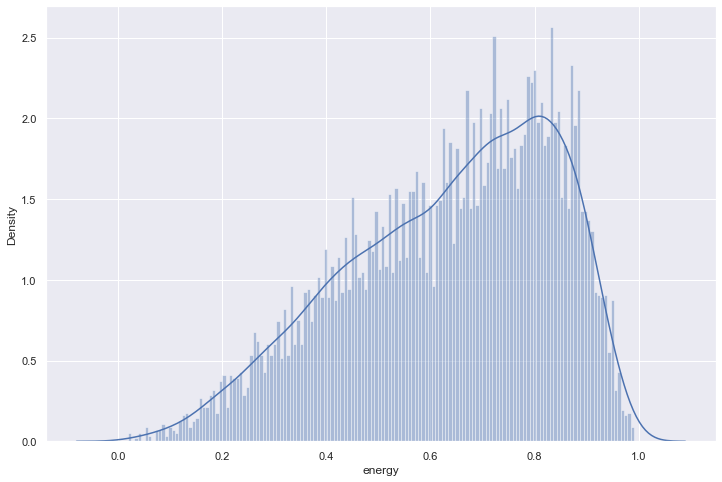

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


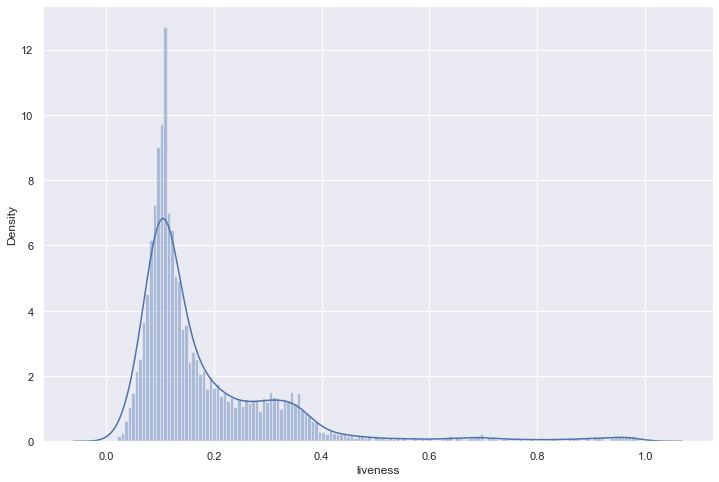

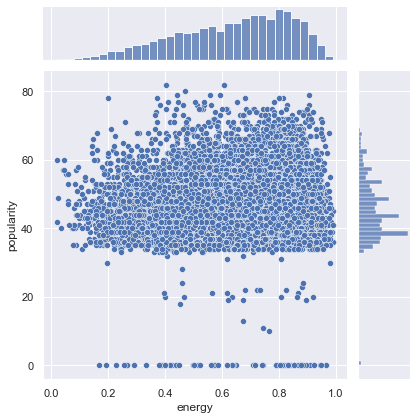

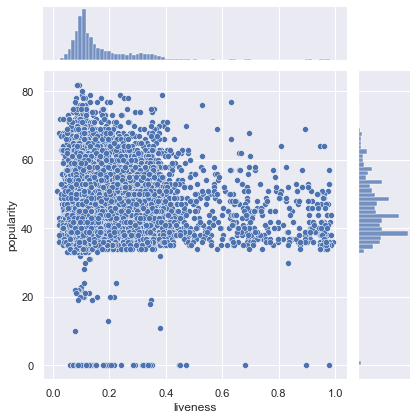

In [181]:
study_of_numerical_features_related_with_popularity(df_group_6)

## Looking more closely at popularity


### Looking at the correlation after eliminating popularity's outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


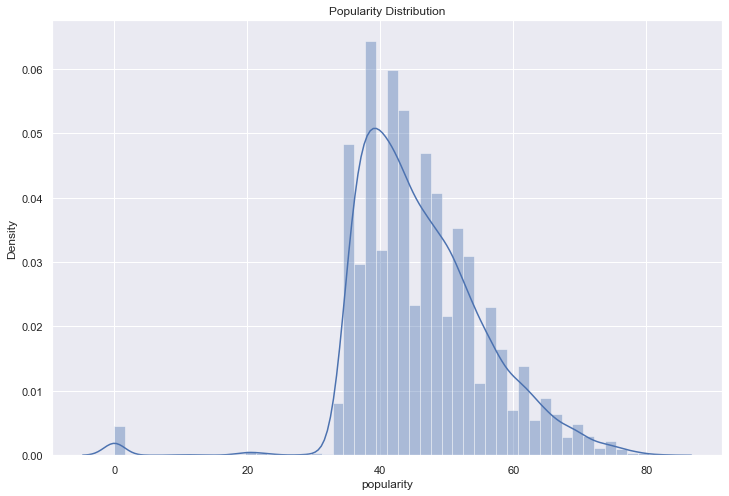

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


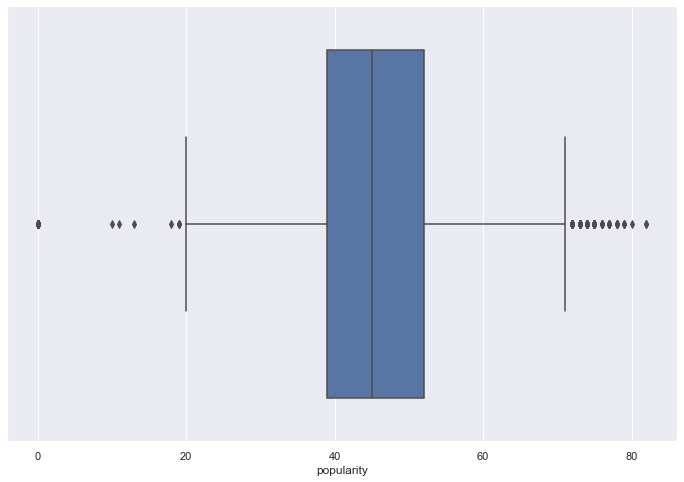

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


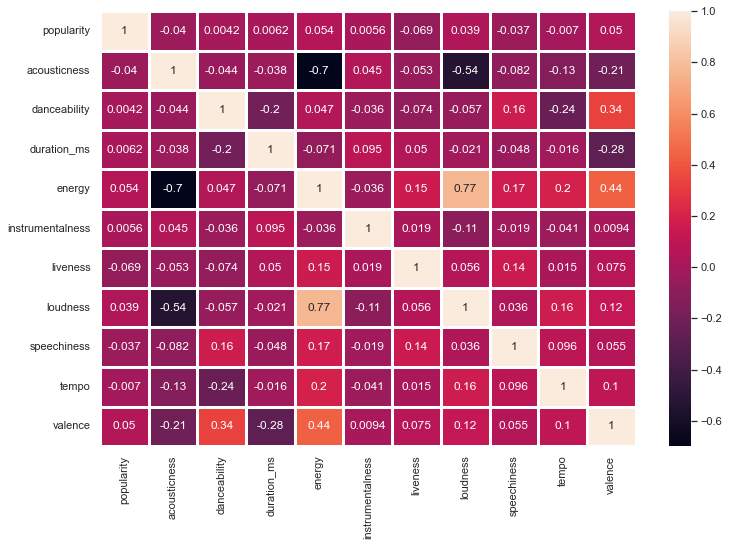

In [182]:
df_group_6_unnecesary = df_group_6.copy()
upper, lower, df_group_6_unnecesary = eliminate_outliers_of_popularity(df_group_6, numericals)

In [183]:
# No improvement can be seen in the correlation

### Grouping popularity

In [184]:
# df_group_6_test = df_group_6.copy()

In [185]:
df_group_6['popularity'] = df_group_6['popularity'].apply(popularity_classification)


C:\Users\Usuario\AppData\Local\Temp/ipykernel_16456/1856196009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_6['popularity'] = df_group_6['popularity'].apply(popularity_classification)


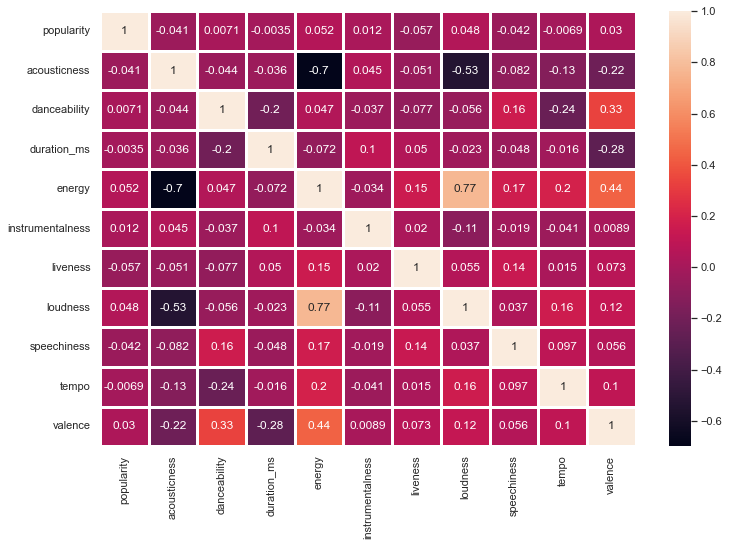

In [186]:
numericals_test = grouping_popularity(df_group_6)

In [187]:
# There is the same correlation for group 6 whether or not the popularity column is grouped. 

### Looking at the numerical features that are mostly related with popularity (now in binary mode)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


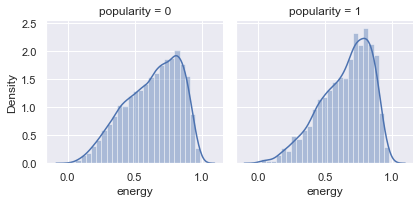

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


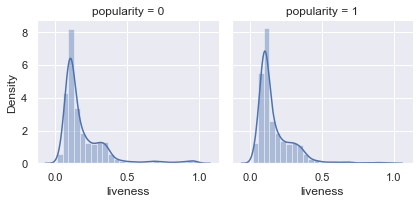

In [188]:
study_of_numerical_features_that_are_most_correlated(numericals_test, list)

### Looking at the categorical features


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


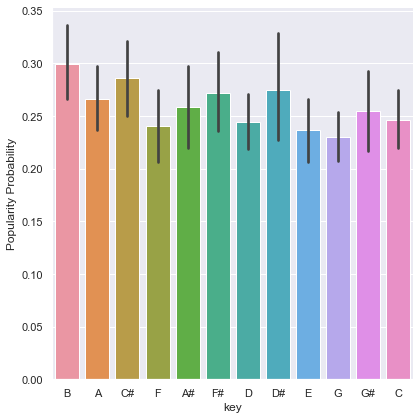

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


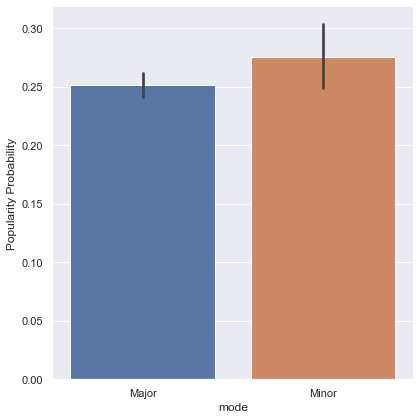

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


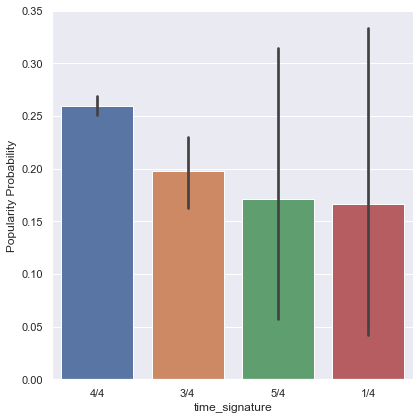

In [189]:
study_of_categorical_features(df_group_6)

In [190]:
df_group_6["key"] = (df_group_6["key"].map({"D" : 4, "F" : 3, "D#" : 10, "C#" : 11, "E" : 2, "C" : 5, "G" : 1, "A" : 8, "A#" : 7, "B" : 12, "G#" : 6, "F#" : 9})).astype('float')
df_group_6["mode"] = (df_group_6["mode"].map({"Minor" : 1, "Major" : 0})).astype('float')
df_group_6["time_signature"] = (df_group_6["time_signature"].map({"4/4" : 4, "3/4" : 3, "1/4" : 1, "5/4" : 2})).astype('float')


C:\Users\Usuario\AppData\Local\Temp/ipykernel_16456/1008573145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_6["key"] = (df_group_6["key"].map({"D" : 4, "F" : 3, "D#" : 10, "C#" : 11, "E" : 2, "C" : 5, "G" : 1, "A" : 8, "A#" : 7, "B" : 12, "G#" : 6, "F#" : 9})).astype('float')
C:\Users\Usuario\AppData\Local\Temp/ipykernel_16456/1008573145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_6["mode"] = (df_group_6["mode"].map({"Minor" : 1, "Major" : 0})).astype('float')
C:\Users\Usuar

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


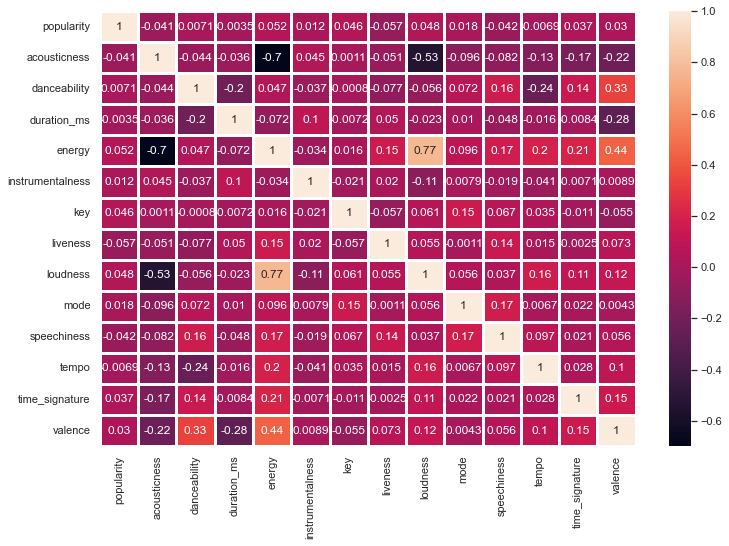

In [191]:
last_correlation_map(df_group_6)

### Modelling group 6


In [192]:
X = numericals_test.drop(['popularity'],axis=1)
y = numericals_test['popularity']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
transformer = StandardScaler().fit(X_train)
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)
    
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True) 

#### Logistic regression


In [193]:
logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test)

accuracy: 0.7417666974453678
precision:  0.0
recall:  0.0
[[1635    1]
 [ 530    0]]


In [194]:
category_0 = numericals_test[numericals_test['popularity'] == 0]
category_1 = numericals_test[numericals_test['popularity'] == 1]

###### Downsampling


In [195]:
downsampling(category_0, category_1)

(2208, 11)
(2208, 11)
accuracy: 0.5507246376811594
precision:  0.5535420098846787
recall:  0.597864768683274
[[271 271]
 [226 336]]


###### Upsampling

In [196]:
upsampling(category_0, category_1)

(6456, 11)
(6456, 11)
accuracy: 0.5401693515076414
precision:  0.5443458980044346
recall:  0.6050523721503389
[[783 822]
 [641 982]]


#### Random Forest Classifier


In [197]:
get_best_Random_forrest(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 6, 'max_depth': 5}


In [198]:
execute_Random_Forest(8,7,6,5,X_train_scaled, X_test_scaled, y_train, y_test)

0.8224068944290551


0    1636
1     530
Name: popularity, dtype: int64

precision:  0.3333333333333333
recall:  0.0018867924528301887


array([[1634,    2],
       [ 529,    1]], dtype=int64)

###### Downsampling 

In [199]:
execute_Random_Forest_downsampling(8,7,6,5, category_0, category_1)

(2208, 11)
(2208, 11)
0.6494565217391305


0    557
1    547
Name: popularity, dtype: int64

precision:  0.5419630156472262
recall:  0.696526508226691


array([[235, 322],
       [166, 381]], dtype=int64)

###### Upsampling 

In [200]:
execute_Random_Forest_upsampling(8,7,6,5, category_0, category_1)

(6456, 11)
(6456, 11)
0.6385790995456423


0    1636
1    1592
Name: popularity, dtype: int64

precision:  0.5579777365491652
recall:  0.7556532663316583


array([[ 683,  953],
       [ 389, 1203]], dtype=int64)

#### Decision Tree Classifier


In [201]:
get_best_Decision_tree_classifier(X_train_scaled, X_test_scaled, y_train, y_test)

{'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 3}


In [202]:
execute_Decision_tree_classifier(3,3,3,3, X_train_scaled, X_test_scaled, y_train, y_test)


0.7417666974453678


0    1636
1     530
Name: popularity, dtype: int64

precision:  0.0
recall:  0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[1636,    0],
       [ 530,    0]], dtype=int64)

###### Downsampling 

In [203]:
execute_Decision_tree_classifier_downsampling(3,3,3,3, category_0, category_1)

(2208, 11)
(2208, 11)
0.5570652173913043


1    571
0    533
Name: popularity, dtype: int64

precision:  0.5466321243523317
recall:  0.7390542907180385


array([[183, 350],
       [149, 422]], dtype=int64)

###### Upsampling 

In [204]:
execute_Decision_tree_classifier_upsampling(3,3,3,3, category_0, category_1)

(6456, 11)
(6456, 11)
0.5427509293680297


0    1615
1    1613
Name: popularity, dtype: int64

precision:  0.5215889464594128
recall:  0.7489150650960942


array([[ 507, 1108],
       [ 405, 1208]], dtype=int64)

In [ ]:
# Conclusion: For group 6 we take the Random Forest Upsampling

# Create a CSV with updated popularity

In [ ]:
df_final = pd.concat([df_group_1, df_group_2, df_group_3, df_group_4, df_group_5, df_group_6], axis = 0)
df_final.columns = ['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']
df_final.to_csv('Songs_Tableau.csv', index = False)